En este trabajo trataremos de entende cuales son los factores que atribuyen a la salud mental de una Persona. Este conjunto de datos fueron obtenidos en el año 2014, el cual mide las diferentes actitudes hacia la salud mental y la frecuencia de los trastornos relacionados a estos en un lugar de trabajo.

Por lo tanto esto nos lleva a realizarnos la Primera Pregunta.

***¿Que se entienden por salud mental en el lugar de trabajo?***

La salud Mental afecta a nuestro bienestar emocional, psicologico y social. Esto afecta por lo tanto a nuestra manera de pensar, sentir y actuar, teniendo una relacion directa de como manejamos nuestro estrés, como nos relacionamos con los démas y sobre todo las decisiones que tomamos. 
En el lugar de trabajo, la comunicacion y la inclusión son habilidades claves para el exito de los equipos o empleados de alto rendimiento.

El impacto de la Salud Mental en una organizacion puede suponer un aumento en los dias de ausencia por parte del trabajador, una disminusion de productividad y el compromiso. A nivel mundial sobre todo en EEUU aproximadamente el 70% de los adultos que sufren depresion forman parte de la poblasion activa. Se estima que se pierde  35 millones de dias  de trabajo al año debido a enfermedad mental, mientras que aquellos trabajadores que sufren una depresion no resuleta sufren un descenson del 35% en su productividad lo cual esto tiene una insidencia directa de el costo que lleva a los empresarios.



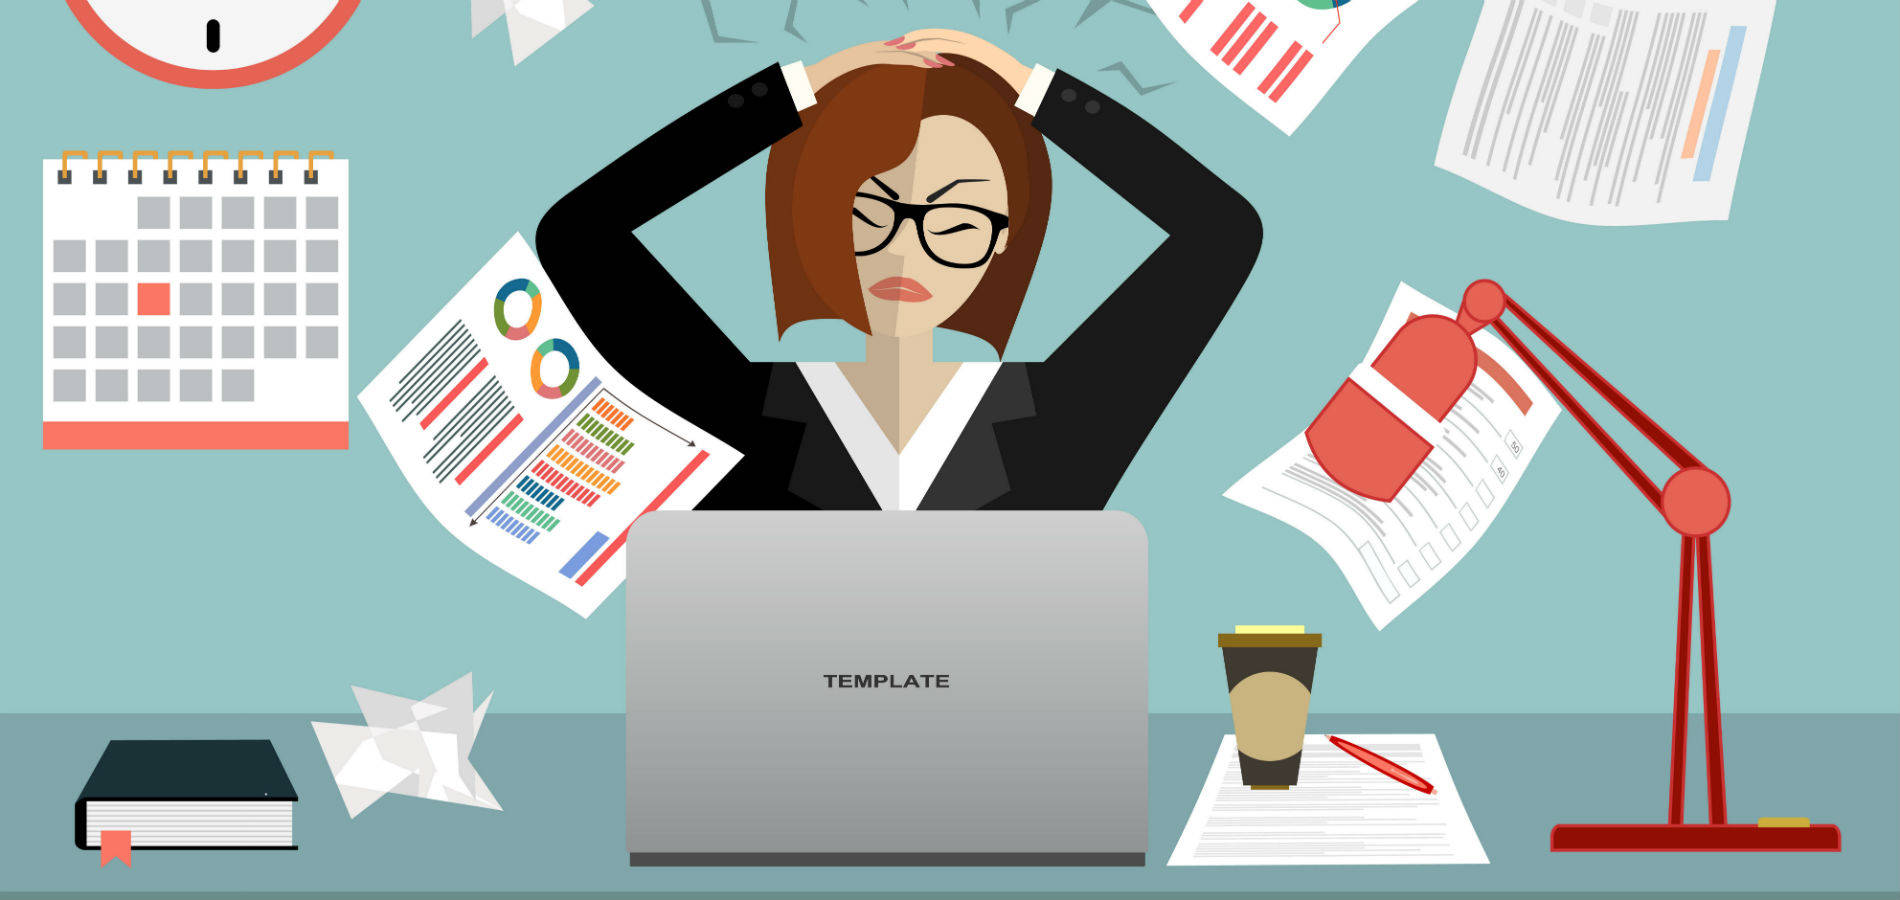

Como segunda pregunta se pueden plantear las siguientes


*¿Que puede hacer la empresa al respecto?*

*¿Quepueden hacer los empresarios?*

Hay algo que se denomina primeros auxilios en salud Mental. Esto enseñan a los participantes a detectar y apoyar a una persona que puede estar sufriendo un crisis o un problema de salud mental y a ponerla en contacto con los recursos adecuados para empleados. Enseñan habilidades criticas de comunicacion y apoyo  que pueden influir en los resultados de la organización.

Las organizaciones que incorporan la concientizacion sobre la salud Mental ayudan a crear un entorno de trabajo saludable y productivo que reduce el estigma asociado a enfermedades mentales.
La implementacion de esta concientización puede ayudar a abrir el camino a los problemas de  salud mental en la comunidad, dotando a las personas de las herramientas necesarias que permitan obtener  la ayuda que necesitan.





---



**Compresion inicial de los datos**

---



In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree




In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Coderhouse/data scientist/DATASET/SaludMental.csv")

In [4]:
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN




---


**Informacion basica acerca del dataframe**


---



In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness



---


## **INTERPRETACION DE LAS COLUMNAS**

El conjunto de datos consta de 26 columnas. La encuesta tiene informacion principalmente en 5 diferentes aspectos, los cuales son:

1.   Información geográfica y demográfica de los encuestados: por ejemplo, edad, sexo, país, estado, antecedentes familiares de enfermedad mental.

2.   Información básica sobre el lugar de trabajo: por ejemplo, si es autónomo o no, número de empleados, si trabaja a distancia o no, si es una empresa tecnológica o no, si interfiere en el trabajo cuando tiene problemas de salud mental.

3.   Apoyo a la salud mental desde los espacios de trabajo:
*  prestaciones: ¿Proporciona su empresa prestaciones de salud mental?
*  opciones_de_atención: ¿Conoces las opciones de atención a la salud mental que ofrece tu empresa?
*  programa_bienestar: ¿Ha hablado alguna vez su empresa de la salud mental como parte de un programa de bienestar para empleados?
*  buscar_ayuda: ¿Proporciona su empresa recursos para aprender más sobre los problemas de salud mental y cómo buscar ayuda?
*  anonimato: ¿Está protegido su anonimato si decide aprovechar los recursos de *  tratamiento de la salud mental o el abuso de sustancias?
*  baja laboral: ¿Le resulta fácil solicitar una baja médica por problemas de salud mental?




*   ***Posible consecuencia negativa:***


*  mental_health_consequence: ¿Cree que hablar de un problema de salud mental con su jefe tendría consecuencias negativas?
*  phys_health_consequence: ¿Cree que hablar de un problema de salud física con su jefe tendría consecuencias negativas?
*  compañeros de trabajo: ¿Estaría dispuesto a hablar de un problema de salud mental con sus compañeros de trabajo?
*  supervisor: ¿Estaría dispuesto a hablar de un problema de salud mental con su(s) superior(es) directo(s)?
*  entrevista_salud_mental: ¿Hablaría de un problema de salud mental con un posible empleador en una entrevista?
*  entrevista_salud_física: ¿Mencionarías un problema de salud física a un posible empleador en una entrevista?
*  mental_vs_physical: ¿Cree que su empleador se toma la salud mental tan en serio como la salud física?
*  obs_consecuencias: ¿Ha oído hablar u observado consecuencias negativas para los compañeros con trastornos mentales en su lugar de trabajo?
*  Buscar o no tratamiento para el trastorno mental: tratamiento



**Normalmente, los factores del individuo y del lugar de trabajo afectarán a la actitud hacia la salud mental. Lo cual basándonos en esta información, podriamos explorar:**

*  Cómo contribuyen estos factores a la actitud del encuestado hacia los trastornos mentales y los tratamientos;
*  ¿Podemos predecir la posibilidad de que una persona busque tratamiento para una enfermedad mental basándonos en esta información?
*  ¿Cómo podemos promover una actitud positiva hacia la salud mental?


***Para responder a estas preguntas, la posibilidad de buscar tratamiento para la enfermedad mental ("tratamiento") se convierte en nuestra variable objetivo, otras serían características.***



---








---


**Limpieza de datos**


---



In [6]:
raw_data = df.copy() # Punto de control

In [7]:
# Valores omitidos

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Conteo", "Porcentaje"])
print("Cantidad de valores perdidos y porcentaje: ")
print(null_summary)

Cantidad de valores perdidos y porcentaje: 
                           Conteo  Porcentaje
comments                     1095   86.973789
state                         515   40.905481
work_interfere                264   20.969023
self_employed                  18    1.429706
seek_help                       0    0.000000
obs_consequence                 0    0.000000
mental_vs_physical              0    0.000000
phys_health_interview           0    0.000000
mental_health_interview         0    0.000000
supervisor                      0    0.000000
coworkers                       0    0.000000
phys_health_consequence         0    0.000000
mental_health_consequence       0    0.000000
leave                           0    0.000000
anonymity                       0    0.000000
Timestamp                       0    0.000000
wellness_program                0    0.000000
Age                             0    0.000000
benefits                        0    0.000000
tech_company                    0   

Puesto que los comentarios suelen ser de forma opcional que proporcionan los encuestados y que faltan al menos 87% de los casos, esta columna ( comments ) no nos proporcionara informacion adicional. Por lo tanto sera eliminada.

In [8]:
df = df.drop("comments",axis = 1)

Tambien podemos observar  que la columna de Estado (State) faltan valores. Es por esto que veremos dicha columna comparada con la columna pais (Country)

In [9]:
country_count = df.Country.value_counts()
country_percent = country_count/len(df.index)*100
country_summary = pd.concat([country_count, country_percent], axis = 1, keys = ["Recuento", "Porcentaje"])
print("Recuento de valores y Porcentaje por País: ")
print(country_summary)

Recuento de valores y Porcentaje por País: 
                        Recuento  Porcentaje
United States                751   59.650516
United Kingdom               185   14.694202
Canada                        72    5.718824
Germany                       45    3.574265
Ireland                       27    2.144559
Netherlands                   27    2.144559
Australia                     21    1.667990
France                        13    1.032566
India                         10    0.794281
New Zealand                    8    0.635425
Poland                         7    0.555997
Switzerland                    7    0.555997
Sweden                         7    0.555997
Italy                          7    0.555997
South Africa                   6    0.476569
Belgium                        6    0.476569
Brazil                         6    0.476569
Israel                         5    0.397141
Singapore                      4    0.317712
Bulgaria                       4    0.317712
Austria    

In [10]:
df.state.unique() # Variable estado

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

Se puede apreciar que aproximadamente el 60% de los datos corresponden al País de Estados Unidos, el 15% proceden de Reino Unido, mientras que el resto de los datos proceden de otros Países  lo cual representa una pequeña parte.

La informacion que proporciona los estados  es solo valida para los datos de Estados Unidos. 
Dado la falta de muchos valores para los restantes Paises y la distribucion de los puntos de datos de EEUU esta sesgada, estas columnas no añadirian mucha informacíon en relacion al estudio que se quiere realizar, por lo tanto seran eliminadas.

In [11]:
df.drop(["Country", "state"],axis = 1, inplace = True)



---

Ahora revisaremos la variable "work_interfere",sabemos que aproximadamente el 21% de los datos de esta variable son NaN. Lo cual lleva a preguntarnos ¿Que ocurre con la distribucion de los demas valores?



---



In [12]:
df["work_interfere"].value_counts(normalize = True)

Sometimes    0.467337
Never        0.214070
Rarely       0.173869
Often        0.144724
Name: work_interfere, dtype: float64



---

Dado que el valor faltante es de aproximado al 21%, lo cual es una proporcion que no se puede ignorar,por ende  lo primero que haremos sera reemplazar los valores faltantes con " Don´t Know".



---



In [13]:
df["work_interfere"] = df["work_interfere"].fillna("Don't know")
df["work_interfere"].value_counts(normalize = True)

Sometimes     0.369341
Don't know    0.209690
Never         0.169182
Rarely        0.137411
Often         0.114376
Name: work_interfere, dtype: float64



---
Interpretando la informacion se puede observar que la repuesta más votada a esta pregunta es " Sometimes" (A veces). Queda comprobar si la actitud  hacia la salud mental  del grupo " Don´t Know" ( No sabe), coincide con el grupo mayoritario " Sometimes".
En el caso de que esto sea afirmativo podemos considerar en asignar estos valores que faltan a este grupo "mayoritario".


In [14]:
def plot_percentage_group(data, feature, target, order = None, figsize = (10,5), palette = "Blues"): # plot de porcentaje, recuento de repuestas de "treatment" (tratamiento) en cada grupo
    feature_percentage = data[feature].value_counts(normalize = True).rename_axis(feature).reset_index(name = "Porcentaje")
    plt.figure(figsize = figsize)
    plt.subplot(1,2,1)
    sns.barplot(x=feature, y="Porcentaje", data = feature_percentage, palette = palette)
    plt.subplot(1,2,2)
    plt.title(feature + " mediante " + target)
    sns.countplot(data[feature], hue = df[target], order =order,palette = palette)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


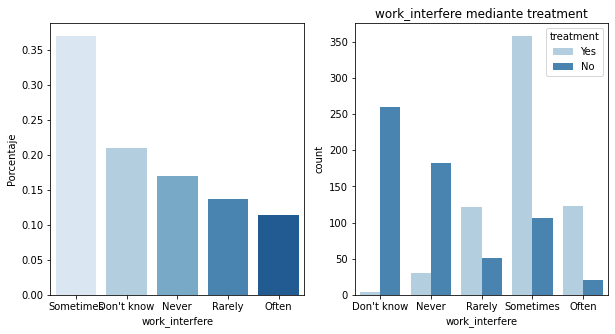

In [15]:
plot_percentage_group(df, "work_interfere", "treatment", order =["Don't know","Never","Rarely","Sometimes","Often"]) 



---

Al parecer el grupo " Don´t know" muetras mas repuestas "No" al "treatment", y se acerca mas a la opcíon "Never".
Podemos deducir que los encuestados que no han buscado o no buscarían tratamiento, tambíen tienden a ignorar las preguntas sobre " Work interfere" ( inferir en el trabajo)



---






---

Ahora comprobaremos la distribucion de "Self Emplopyed" ( Trabajador Autonomo)


---



In [16]:
df["self_employed"].value_counts(normalize = True)

No     0.882353
Yes    0.117647
Name: self_employed, dtype: float64



---
Dado que solo falta un 1,4% de los datos y que NO contituyen  la mayoria de las respuestas. La cual puede estar asociada a los encuestados que ignoraron esta respuesta.
Se podra por lo tanto rellenar los valores que faltan como "No".



---



In [17]:
df["self_employed"] = df["self_employed"].fillna("No")
df["self_employed"].value_counts(normalize = True)

No     0.884035
Yes    0.115965
Name: self_employed, dtype: float64

Ahora comprobaremos el valor que falta

In [18]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Cantidad", "Porcentaje"])
print("Recuento y Porcentaje de valores perdidos: ")
print(null_summary)

Recuento y Porcentaje de valores perdidos: 
                           Cantidad  Porcentaje
Timestamp                         0         0.0
Age                               0         0.0
mental_vs_physical                0         0.0
phys_health_interview             0         0.0
mental_health_interview           0         0.0
supervisor                        0         0.0
coworkers                         0         0.0
phys_health_consequence           0         0.0
mental_health_consequence         0         0.0
leave                             0         0.0
anonymity                         0         0.0
seek_help                         0         0.0
wellness_program                  0         0.0
care_options                      0         0.0
benefits                          0         0.0
tech_company                      0         0.0
remote_work                       0         0.0
no_employees                      0         0.0
work_interfere                    0         



---
Ahora veremos si las columnas presentan Outliers ( valores atipicos).


---




In [19]:
for col in df.columns:
    print(col, end= ': ')
    print(df[col].unique())

Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' '



---

Podemos apreciar que figuran algunos valores pocos razonables como ser en la columna Age, la cuales presentan valores negativos, o valores por debajos de 14 ( Edad que es poco razonable para un empleado) o por encima de 100.
Determinemos cuantos de estos valores superan el rango [14,100].



---



In [20]:
print(df["Age"][df["Age"]<14].count())
print(df["Age"][df["Age"]>100].count())

6
2




---


Los Outliers solo constituyen una porción muy pequeña, por lo que podemos 
eliminarlos sin problemas ya que son puntos pocos razonables.


---






In [21]:
df.drop(df[df["Age"]<14].index, inplace = True)
df.drop(df[df["Age"]>100].index, inplace = True)
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])



---

Podemos observar tambien que la columna "Gender" (Genero), presenta varias clases diferentes y/o frases.


---



In [22]:
df["Gender"].value_counts()

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     



---


Se agruparan las palabras en tres categorías las cuales seran:


1.   Female (Femenino)
2.   Male  (Masculino)
3.   Others (Otros)



In [23]:
male_group = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile','Cis Male', 
              'Mal', 'Male (CIS)',  'Make', 'Male ', 'Man', 'msle', 
              'Mail', 'cis male', 'Malr', 'Cis Man']
female_group = ['Female', 'Female ','female','Cis Female', 'F', 'Woman', 'f','woman', 
                'Femake', 'cis-female/femme', 'Female (cis)', 'femail']
other_group = ['Trans-female','non-binary', 'Nah', 'Enby', 'fluid', 'Genderqueer', 
               'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'Neuter',
               'queer', 'queer/she/they','Trans woman',
               'Female (trans)','male leaning androgynous', 
               'ostensibly male, unsure what that really means',
               'something kinda male?']
total_words = len(male_group) + len(female_group) + len(other_group)
assert(total_words == len(df["Gender"].unique())) # Esto es para asegurarnos de que las palabras esten categorizadas

df["Gender"].replace(male_group,"Male",inplace=True)
df["Gender"].replace(female_group,"Female",inplace=True)
df["Gender"].replace(other_group,"Others",inplace=True)
df["Gender"].value_counts()

Male      986
Female    247
Others     18
Name: Gender, dtype: int64



---

Se puede observar que la mayoria de los encuestados son Hombres.
Esto refleja la tendencia a que haya más hombres que mujeres trabajando en el sector Tecnológico.

Ahora nos preguntamos ¿Qué ocurre con las otras variables?

La columna de timestamp registra el momento en que la encuesta fue enviada, por lo que es irrelevante para nuestra pregunta, por lo tanto sera eliminada del nuestro dataframe.



---



In [24]:
df.drop("Timestamp", axis = 1, inplace = True)
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [25]:
df= df.reset_index(drop=True)
for col in df.columns:
    print(col, end= ': ')
    print(df[col].unique())
data_cleaned = df.copy() 

Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]
Gender: ['Female' 'Male' 'Others']
self_employed: ['No' 'Yes']
family_history: ['No' 'Yes']
treatment: ['Yes' 'No']
work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]
no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work: ['No' 'Yes']
tech_company: ['Yes' 'No']
benefits: ['Yes' "Don't know" 'No']
care_options: ['Not sure' 'No' 'Yes']
wellness_program: ['No' "Don't know" 'Yes']
seek_help: ['Yes' "Don't know" 'No']
anonymity: ['Yes' "Don't know" 'No']
leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence: ['No' 'Maybe' 'Yes']
phys_health_consequence: ['No' 'Yes' 'Maybe']
coworkers: ['Some of them' 'No' 'Yes']
supervisor: ['Yes' 'No' 'Some of them']
mental_health_interview: ['No' 'Yes' 'Maybe']
phys_health_interview: ['Maybe' 'No' 'Yes']




---

Una Vez eliminados los missing values y Outliers, el dataset esta listo para realizar el Anlisis Exploratorio de Datos (EDA)



---





---

# **ANALISIS EXPLORATORIO DE DATOS (EDA)**

---



En primer lugar lo que se realizara sera explorar la variable objetivo

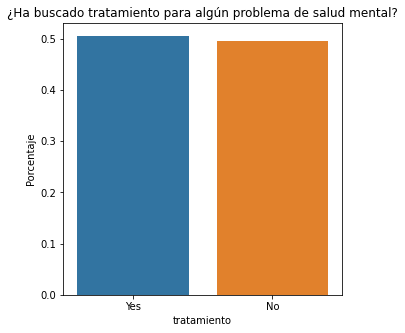

In [26]:
treatment_percentage = df["treatment"].value_counts(normalize = True).rename_axis("tratamiento").reset_index(name = "Porcentaje")
plt.figure(figsize = (5,5))
plt.title("¿Ha buscado tratamiento para algún problema de salud mental?")
sns.barplot(x = "tratamiento", y = "Porcentaje", data = treatment_percentage)



---
Se puede observar que las respuestas "Yes" y "No" representan aproximadamente la mitad de estas.
Por lo tanto los datos objetivos estan equilibrados en estas dos categorias.



---






---

Ahora nos preguntamos ¿ Como se correlacionarían la informacion geografica y demográfica con la actitud de los encuestados ante el tratamiento de las enfermedades mentales?


---

Antes veamos la caracteristica que presenta la edad.

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64
Asimetria = 1.01


treatment
No     31.534733
Yes    32.607595
Name: Age, dtype: float64

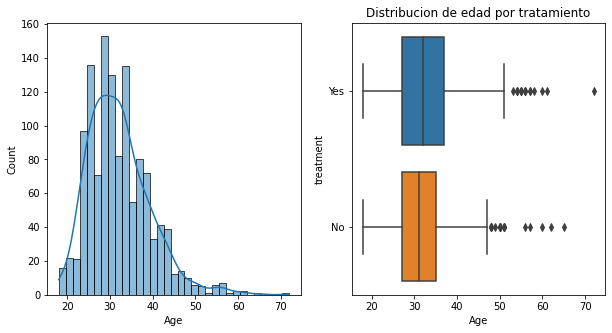

In [27]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(x="Age", data = df, kde = True)
plt.subplot(1,2,2)
plt.title("Distribucion de edad por tratamiento")
sns.boxplot(x= df["Age"], y = df["treatment"])
print(df["Age"].describe())
print("Asimetria = %.2f"%(df["Age"].skew()))
df.groupby("treatment")["Age"].mean()



---
La caracteristica de la edad muestra una distribucíon sesgada a la derecha, lo que esto significa que las muestras de datos que se posee tienden a proceder de los mas jóvenes, que se encuentran entre los 20 y 40 años de edad.
Esto puede estar asociado o relacionado con el hecho de que los encuestados procedían del sector tecnológico. Por otro lado a partir del diagrama de caja en los dos grupos definidos por "tratamiento" ( un grupoa buscado tratamiento para la enfermedad mental, mientras que el otro no), se puede observar que no hay diferencias significativas  entre las edades de los dos grupos presentes.


---






---

***Genero y Antecedentes familiares.***


---





---


Analicemos ahora  las variables "Gender" y "family history", las cuales son caracteristicas personales que se relacionan. Veamos como se vinculan estas dos variables con el tratamiento.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


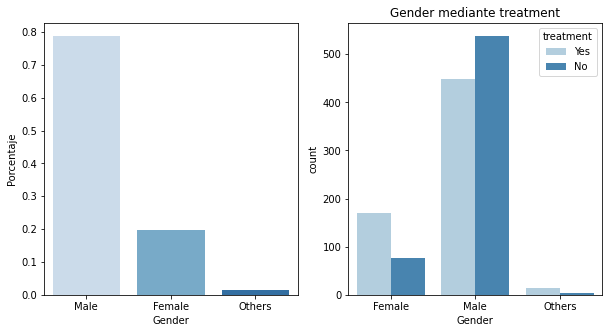

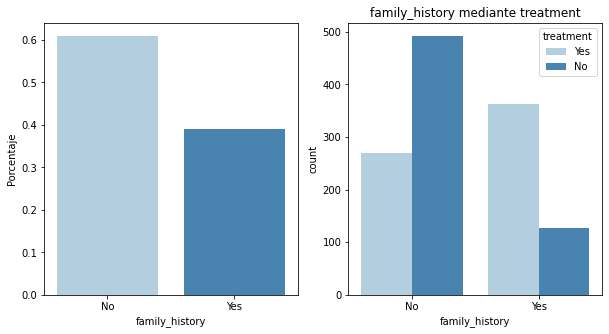

In [28]:
for feature in ["Gender","family_history"]:
    plot_percentage_group(df, feature, "treatment")



---
Se observan patrones distintos entre los grupos de hombres y mujeres, como asi tambien entre los gurpos con y sin historia familiar.



1.   ** La proporción de mujeres que han buscado tratamiento es mayor que la de los hombres.**
2.   **Los que presentan antecedentes familiares de enfermedades mentales tienen más probabilidades de buscar un tratamiento que los demás grupos.**

¿Como se relacionan las variables "work interfere" ( interferencia laboral), el estilo de trabajo ( autónomo, trabajo remoto, empresas tecnologicas) y la escala de el lugar de trabajo ( número de empleados), con la actitud hacia el tratamiento?

Ya hemos visto que las personas tienden a buscar tratamiento contra las enfermedades mentales cuando creen que su trabajo se verá afectado por alguna de estas enfermedades ( grafico anterior y grafico siguiente), por lo que " work interfere" seria un factor importante que afectaria a la actitud de los encuestados.



---








/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


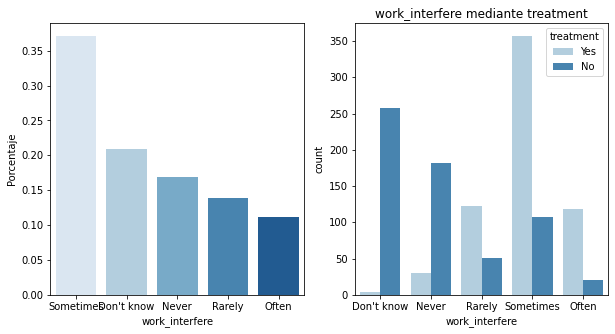

In [29]:
plot_percentage_group(df, "work_interfere", "treatment", order =["Don't know","Never","Rarely","Sometimes","Often"])



---

Veamos tambien las distribuciones de las variables " self_employed, romete_work, tech_company, nomber_of_employees" en dos grupos ( por tratamiento).

---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


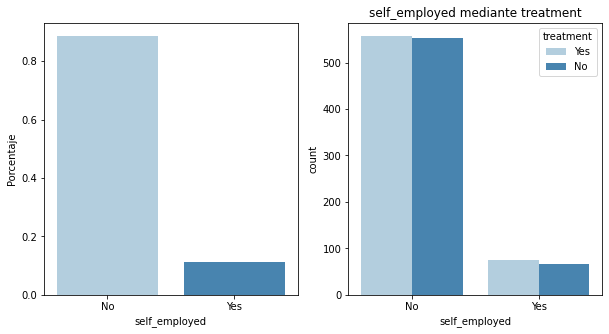

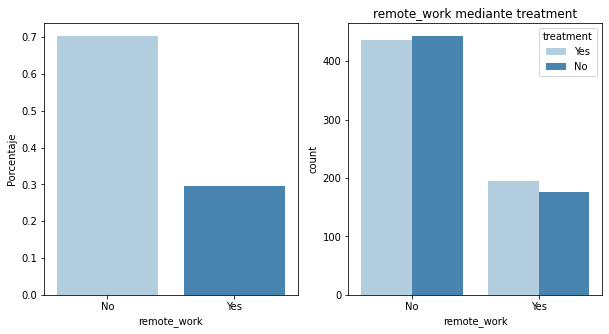

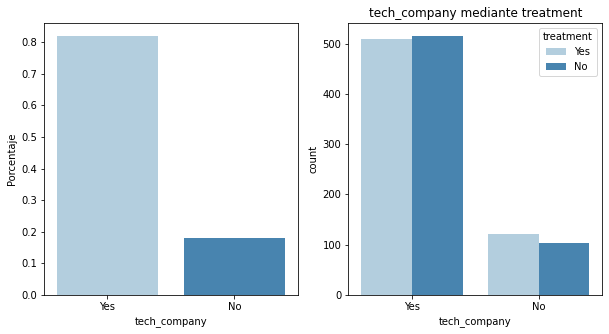

In [30]:
for feature in ["self_employed","remote_work","tech_company"]:
    plot_percentage_group(df, feature, "treatment", figsize=(10,5))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


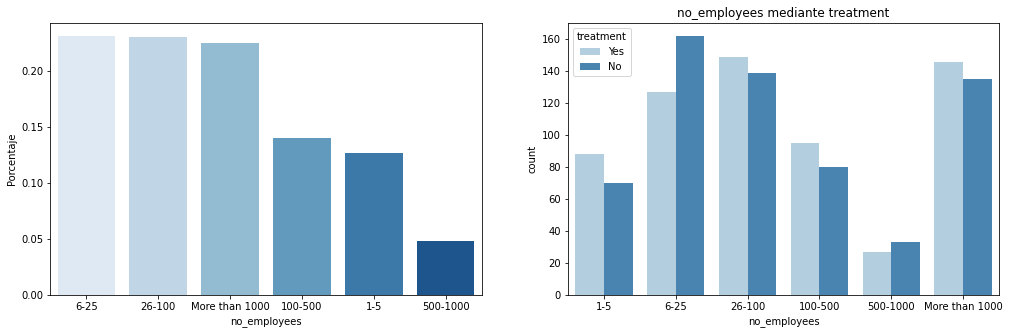

In [31]:
plot_percentage_group(df, "no_employees", "treatment", order = ['1-5', '6-25', '26-100', '100-500', '500-1000','More than 1000'],figsize=(17,5))



---

No se puede observar correlaciones significativas entre estas variables.

Por lo tanto, el tipo de trabajo (autonomo, trabajo remoto, empresa tecnologica) y el tamaño de la empresa no contribuyen significativamente a la actitud.

Sin embargo a de tener en cuenta que la frecuencia con la que un trastorno mental interfiere en el trabajo si está relacionada con la actitud.

Es por esto que analizaremos el apoyo que proporciona la empresa con respecto a la salud mental 


---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

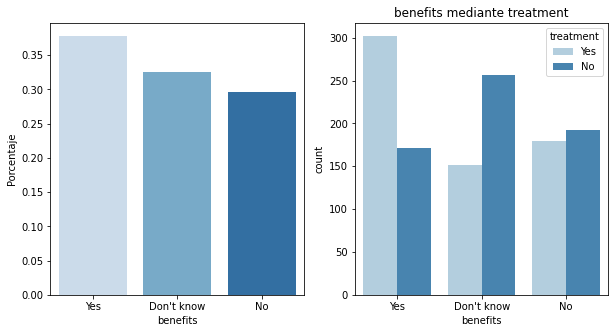

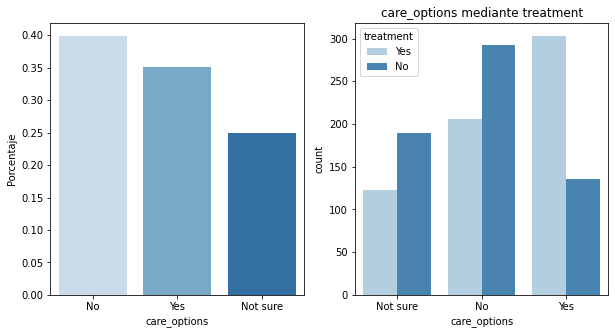

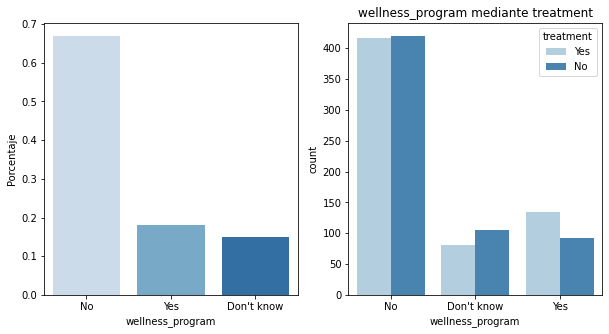

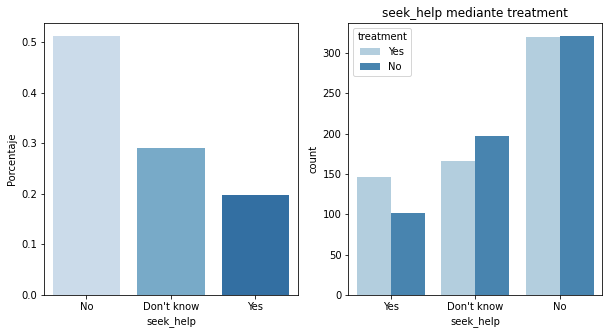

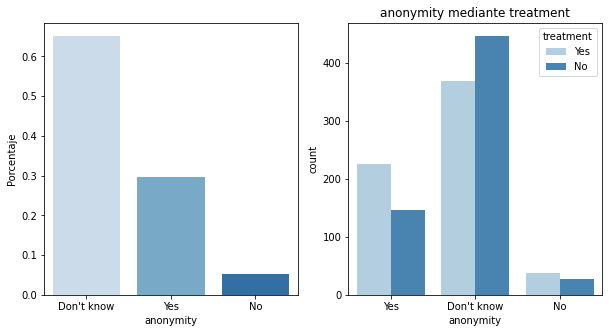

In [32]:
for feature in ["benefits", "care_options", "wellness_program", "seek_help", "anonymity"]:
    plot_percentage_group(df, feature, "treatment", figsize=(10,5))



---
Por los graficos anteriores se puede interpretar que cuando el empresario ofrece un buen apoyo es decir prestaciones, opciones de atención, programa de bienestar, etc, un mayor porcentaje de los encuestados buscará tratamiento para su enfermedad mental.


---




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


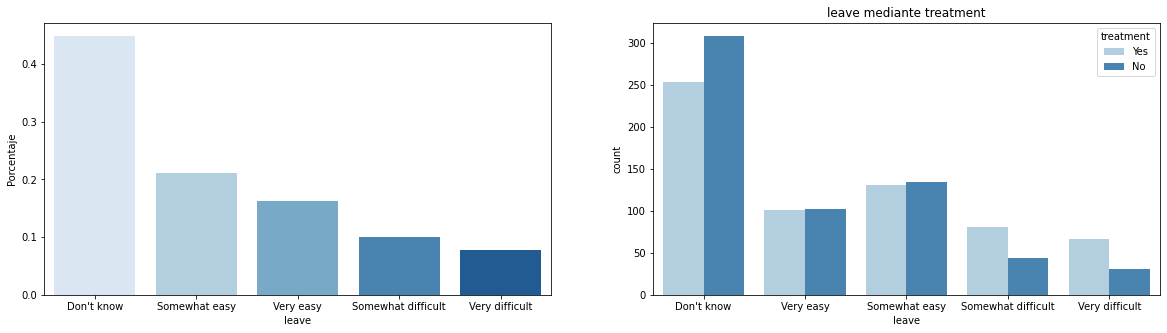

In [33]:
plot_percentage_group(df, "leave", "treatment", order =["Don't know",'Very easy','Somewhat easy', 'Somewhat difficult', 'Very difficult'],figsize=(20,5))



---
Al parecer  cuando es mas difícil  pedir la baja médica por un problema de salud mental, los encuestados tienden a buscar tratamiento. Pero la proporcion de " somewhat difficult" ( algo dificil) o "very difficult" ( muy dificil) es relativamente pequeña. Por lo que no se puede llegar a una conclusion en este momento.

Otros factores que incluyen el miedo a "consecuencias negativas" tras revelar la enfermedad mental en público, especialmente en supervisores o compañeros de trabajo. Observemos como pueden estas variables afectar  a las actitudes hacia las enfermedades mentales.


---




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

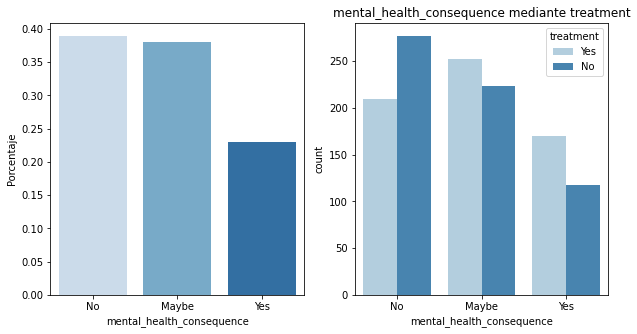

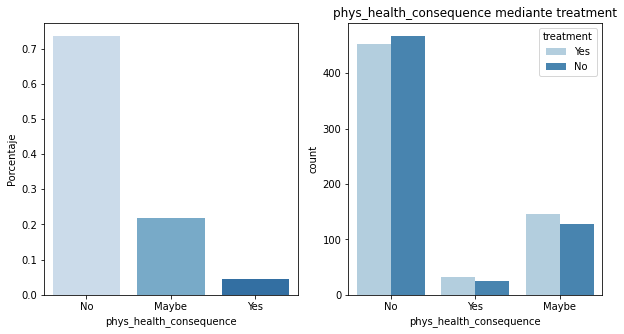

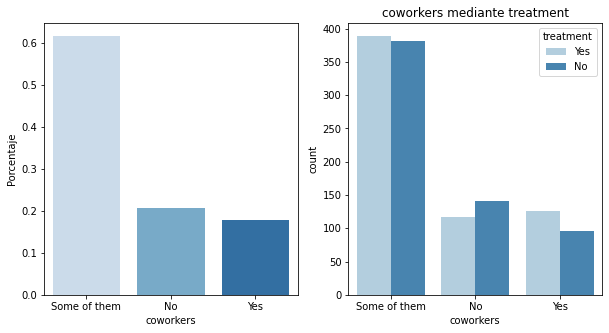

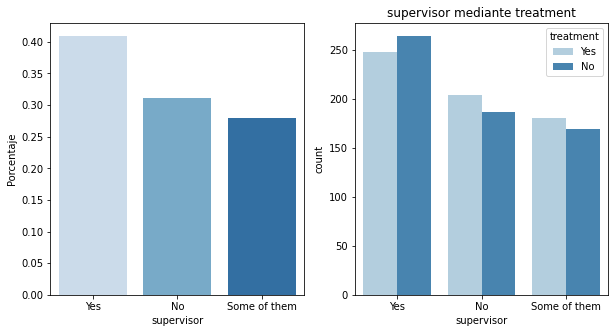

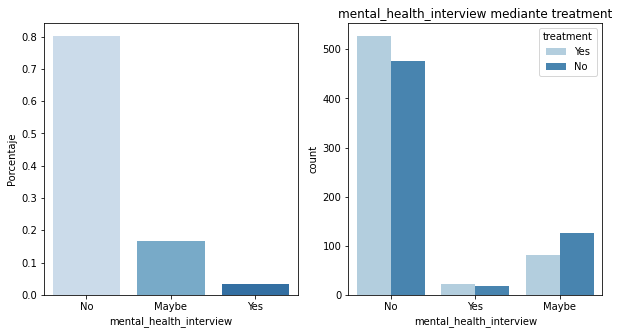

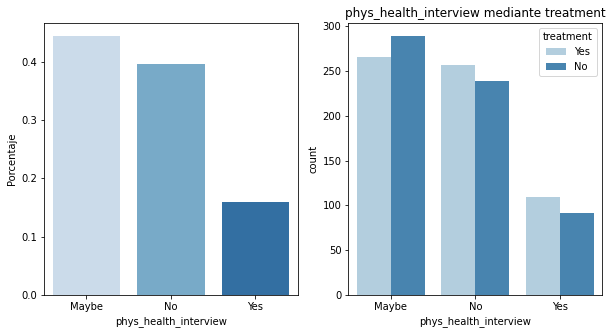

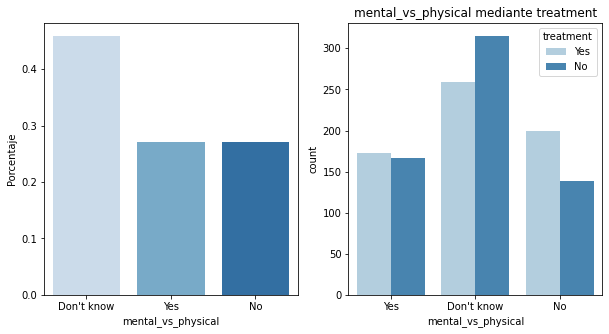

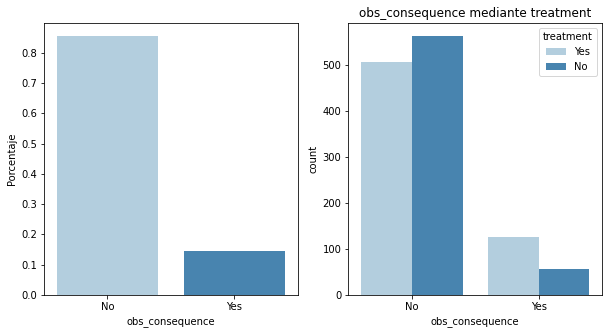

In [34]:
for feature in ["mental_health_consequence", "phys_health_consequence", "coworkers", 
                "supervisor", "mental_health_interview",'phys_health_interview','mental_vs_physical','obs_consequence']:
    plot_percentage_group(df, feature, "treatment", figsize=(10,5))



---
Se puede observar que cuando los encuestados piensan que hablar de un problema de salud mental con el empleado tendría consecuencias negativas, están dispuestos a hablar de esto con sus compañeros de trabajo y oído hablar u observado consecuencias negativas en el ambito laboral debido a estas enfermedades, por lo que tienden a buscar tratamiento.

A continuación, se realizará un análisis de correlacion para cuantificar sus relaciones.

Antes que eso suceda, hay que codificar los datos categóricos en datos numéricos.



---






---
# **CODIFICACION DE DATOS**



---




In [35]:
yes_no_features = ['self_employed', 'family_history', 'treatment',
                   'remote_work', 'tech_company','obs_consequence'] # Esta repuesta solo contienen "Si" o "No", pueden asignarse facilmente a [0,1]
yes_no_unknown_features = ['benefits','wellness_program','seek_help','anonymity','mental_vs_physical'] 
yes_no_maybe_features = ['mental_health_consequence','phys_health_consequence','mental_health_interview','phys_health_interview']
yes_no_someofthem_features = ['coworkers','supervisor'] # Esta repuesta tiene un nivel intermedio entre "Si" y "No"
onehot_features=['Gender', 'leave','work_interfere'] # Esta repuesta contienen repuesta que no son ordinarias, usamos la codificacion one-hot

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder



ordinal_encoder = OrdinalEncoder(categories=[['No', 'Yes']])
for feature in yes_no_features:
    df[feature] = pd.Series(ordinal_encoder.fit_transform(df.loc[:,[feature]]).squeeze())

ordinal_encoder = OrdinalEncoder(categories=[['No', "Don't know", 'Yes']])
for feature in yes_no_unknown_features:
    df[feature] = pd.Series(ordinal_encoder.fit_transform(df.loc[:,[feature]]).squeeze())
    
ordinal_encoder = OrdinalEncoder(categories=[['No', 'Maybe', 'Yes']]) 
for feature in yes_no_maybe_features:
    df[feature] = pd.Series(ordinal_encoder.fit_transform(df.loc[:,[feature]]).squeeze())

ordinal_encoder = OrdinalEncoder(categories=[['No', 'Some of them', 'Yes']])
for feature in yes_no_someofthem_features:
    df[feature] = pd.Series(ordinal_encoder.fit_transform(df.loc[:,[feature]]).squeeze())

ordinal_encoder = OrdinalEncoder(categories=[['No', "Not sure", 'Yes']])
df["care_options"] = pd.Series(ordinal_encoder.fit_transform(df.loc[:,["care_options"]]).squeeze())

ordinal_encoder = OrdinalEncoder(categories=[['1-5', '6-25', '26-100', '100-500', '500-1000','More than 1000']]) # pedido
df["no_employees"] = pd.Series(ordinal_encoder.fit_transform(df.loc[:,["no_employees"]]).squeeze())

onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df.loc[:,onehot_features]).toarray()
newfeature = onehot_encoder.get_feature_names(onehot_features)
df[newfeature] = pd.DataFrame(onehot_encoded)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
df_all_variable = df.copy() 
df.drop(columns= onehot_features,inplace=True) 
df

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,work_interfere_Don't know,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,37,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,32,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,31,0.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,26,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1247,32,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1248,34,0.0,1.0,1.0,5.0,0.0,1.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1249,46,0.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
for col in df.columns:
    print(col, end=": ")
    print(df[col].unique())

Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]
self_employed: [0. 1.]
family_history: [0. 1.]
treatment: [1. 0.]
no_employees: [1. 5. 2. 3. 0. 4.]
remote_work: [0. 1.]
tech_company: [1. 0.]
benefits: [2. 1. 0.]
care_options: [1. 0. 2.]
wellness_program: [0. 1. 2.]
seek_help: [2. 1. 0.]
anonymity: [2. 1. 0.]
mental_health_consequence: [0. 1. 2.]
phys_health_consequence: [0. 2. 1.]
coworkers: [1. 0. 2.]
supervisor: [2. 0. 1.]
mental_health_interview: [0. 2. 1.]
phys_health_interview: [1. 0. 2.]
mental_vs_physical: [2. 1. 0.]
obs_consequence: [0. 1.]
Gender_Female: [1. 0.]
Gender_Male: [0. 1.]
Gender_Others: [0. 1.]
leave_Don't know: [0. 1.]
leave_Somewhat difficult: [0. 1.]
leave_Somewhat easy: [1. 0.]
leave_Very difficult: [0. 1.]
leave_Very easy: [0. 1.]
work_interfere_Don't know: [0. 1.]
work_interfere_Never: [0. 1.]
work_interfere_Often: [1. 0.]
work_interfere_Rarely: [0. 1.]
work_interfer



---
**Matriz de correlacion por pares:**

¿Como se relaciona cada característica con las demás y con el objetivo?



---




<ipython-input-38-db8c9cc2b4a8>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


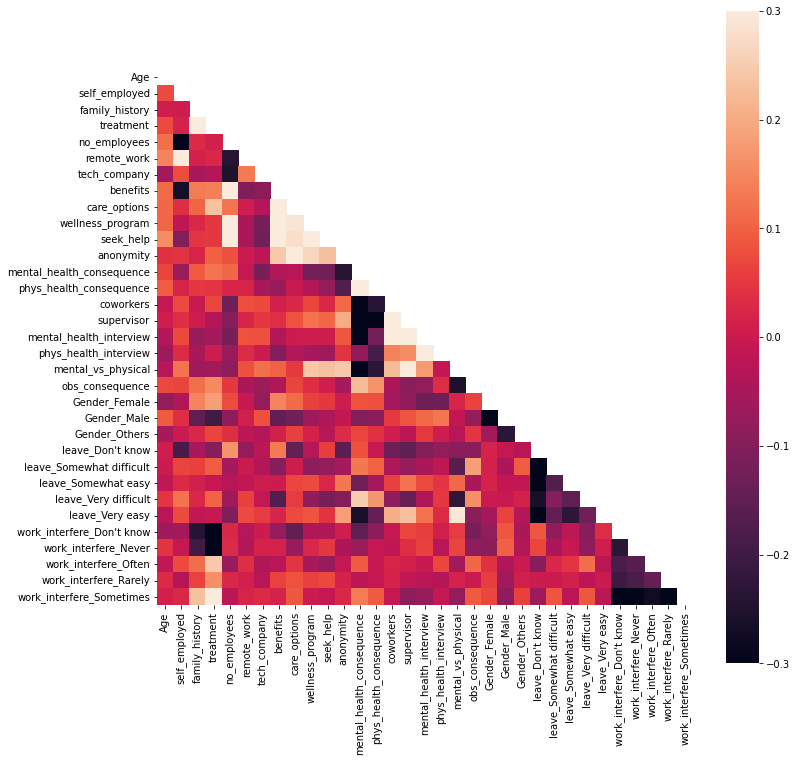

In [38]:
corr_mat = df.corr() # Correlacion por pares
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat, mask = mask, vmin = -.3, vmax=.3, square=True)



---
Podemos observar algunas correlaciones positivas entre las variables:



*   Interferencia laboral vs tratamiento e historia familiar: Tener antecedentes familiares, o buscar tratamiento, puede indicar que el encuestado tiene altas probabilidades de sufrir interferencias laborales por su condición mental.
*   Número de empleados frente a prestaciones, programa de bienestar y buscar ayuda. Las empresas más grandes pueden llegar a tener mejores instalaciones que ayuden a la salud mental.


*   Prestaciones, opcion de atencíon, programas de bienestar, pedido de ayuda y anonimato: Estas 5 diferentes variables están correlacionadas por pares, Todas ellas son indicadores que sirven para toma de desicion de los empresarios.
*   Compañeros de trabajo vs supervisores vs entrevistas sobre salud mental: Aquellas personas que suelen estar dispuestas a hablar de tema de salud fisica durante la entrevista también están dispuestas a hablar de temas de salud mental durante la entrevista.


**Correlaciones negativas**

*   Consecuencias sobre la salud mental vs entrevista sobre salud física, mental, supervisores y compañeros de trabajo: Cuando los empleados perciben mas consecuencias negativas sobre su estado mental, tienden a pensar  que los empresa no toman la salud mental como un factor importante en comparacion con la salud física, y no están dispuestos a hablar de los temas relacionados con estos en el periodo de entrevista  como asi tambien en con el supervisor o compañeros de trabajo.



*   Las consecuencias  de la salud física muestran una correlacion similar con las variables anteriores.
*   Secuencia observada vs mental vs física: Si el empresario se compromete con la salud mental al igual que como la física, el empleado tiende a no observar oír ni hablar de las consecuencias negativas sobre las consecuencias negativas sobre las condiciones mentales.

A continuacion, nos centraremos en las correlaciones con las variable "treatment".



---












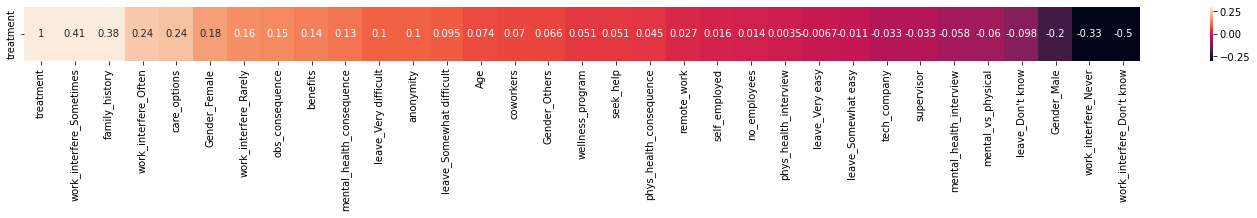

In [39]:
# correlacion con "treatment"
corr_treatment = corr_mat['treatment'].sort_values(ascending=False).to_frame().T
plt.subplots(figsize=(25,1))
sns.heatmap(corr_treatment, vmin = -.3, vmax=.3, annot=True)


 
---

Las 9 variables con mas correlacionadas con treatment son: work_interfere, family_history, care_options, Gender, obs_consequence, anonymity.

En el caso de la variable Género, podemos observar que el femenino está positivamente correlacionado con el tratamiento, mientras que el masculino hace lo contrario: correlaciona negativamente el objetivo tratamiento.

*Esto es coherente con lo que se puede observar en el analisis preliminar de que las mujeres que responden tienden a menudo buscar tratamiento.*

Las variables principales tambíen son coherentes con nuestro analisis preliminar.





---





---

Prueba de correlaciones entre las 9 variables.



---





<ipython-input-40-4ffacfc36012>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(treatment_corr, dtype=np.bool)


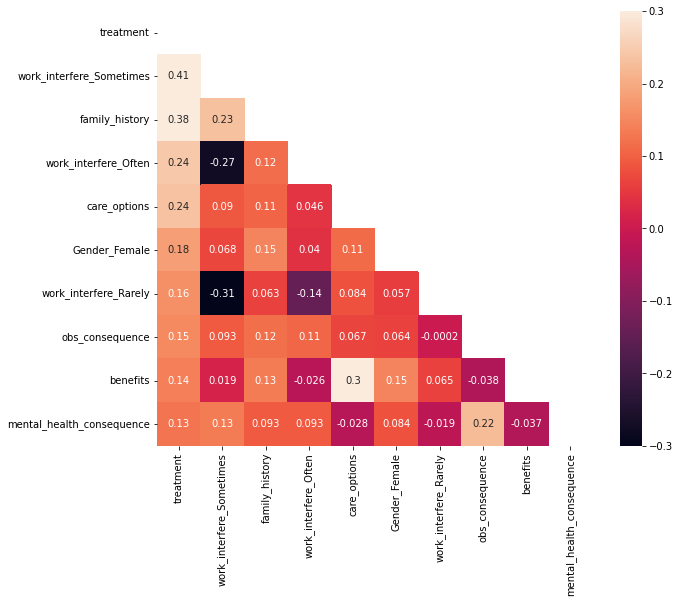

In [40]:
k = 10 #top k de correlaciones (incluyendo treatment) 
cols = corr_mat.nlargest(k, 'treatment')['treatment'].index
treatment_corr = df[cols].corr()
mask = np.zeros_like(treatment_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,8))
sns.heatmap(treatment_corr,mask = mask, vmin = -.3, vmax=.3, square=True, annot=True, annot_kws={'size': 10})

feature_names = df.drop("treatment", axis = 1).columns
cols = cols[1:]
corr_features = pd.DataFrame(np.zeros((1,len(df.columns)-1)), columns = feature_names, index = ["corr"])
corr_features[cols]=1



---



*   Care_options ( opciones de asistenciales) está relacionado con los beneficios y el nonimato: Todas estas son ayudas por parte de los empresarios.
*   Mental_Health ( Salud mental) esta se correlaciona negativamente con el anonimato, a mayor nivel de anonimato, menor percepcíon de consecuencias negativas se tiene.



---







---

# **MODELOS DE PREDICCION**


---





---

Trataremos de probar modelos base y los modelos de conjunto para poder predecir si un encuenstado ha buscado o no tratamiento para una enfermedad mental a partir de estas características. En primer lugar, utilizaremostodas las caracteristicas para ajustar el modelo y comprobar qué características se seleccionarán ( altamente ponderadas). 
Los hiperparámetros se ajustarán mediante validación cruzada.

Modelo base:


*   *Logistic Regression*
*   *k-Nearest Neighbor*
*   *Decision Tree*

Modelo conjunto:



*   *Ramdom Forest*
*   *Adaboositing*


*   *Gradient Boosting*




---













---


**Caracteristicas y objetivos**

---



In [41]:
X = df.drop(columns = ["treatment"])
y = df["treatment"]



---


**Normalizacion de las caracteristicas**

---



In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)



---

**Entrenamiento / prueba Split**



---



In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify = y, random_state=10)



---
**Validacion cruzada y búsqueda de hiperparametros**

Para buscar de una forma eficiente los hiperparametros que sean óptimos, aplico el metodo Bayesian de optimizacion, esto es para maximizar iterativamente la mejora de la Expectativa (EI). En este caso se usa Tree-structure Parzen Estimator (TPE), con el paquete hyperopt para la optimizacion de hiperparametros.



---




In [44]:
from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score, accuracy_score, f1_score



---


***Definir la función objetivo ***

Utilizamos la puntuacion de validacion cruzada ( accuaracy) como objetivo para el ajuste de hiperparámetros ( se multiplica por (-1) para convertir la funcion de perdida)



---



In [45]:
def objective(params): # funcion de perdida para optimizacion de hiperparametros
    model = params.pop("model")
    clf = model(**params)
    clf.fit(X_train, y_train)
    return -np.mean(cross_val_score(clf, X_train, y_train, cv=5)) # validacion cruzada

def evaluate_model(space, best): # Evaluacion del modelo: puntuacion de prediccion: accuracy, f1 score, confusion matrix,  etc.
    opt_para = space_eval(space, best)
    model = opt_para.pop("model")
    clf = model(**opt_para)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_score_ = f1_score(y_test,y_pred)
    report = classification_report(y_test, y_pred, target_names = ('No','Yes'))
    conf_mat = confusion_matrix(y_test,y_pred, labels = [0,1])
    fpr, tpr, threshold = roc_curve(y_test, y_pred)

    auc_score = roc_auc_score(y_test, y_pred)
    model_dict={}
    model_dict["model"]=clf
    model_dict["para"]=opt_para
    model_dict["y_pred"]=y_pred
    model_dict["accuracy"]=accuracy
    model_dict["f1_score"]=f1_score_
    model_dict["report"]=report
    model_dict["conf_mat"]=conf_mat
    model_dict["fpr"]=fpr
    model_dict["tpr"]=tpr
    model_dict["threshold"]=threshold
    model_dict["auc_score"]=auc_score
    return model_dict   

def trial_ana(trials, para_keys): # Hay que leer las puntuaciones y los parametros de cada ensayo
    scores = []
    params = {}
    for k in para_keys:
        params[k]=[]
    for t in trials:
        scores.append(-t["result"]["loss"])
        for k in para_keys:
            params[k].append(t["misc"]["vals"][k][0])
    return scores, params



---

***Logistic Regression***



---



In [46]:
score_name = ["cv_score","pred_score","auc_score","f1_score"]


from sklearn.linear_model import LogisticRegression
lr_space = {"model":LogisticRegression,
         "C": hp.uniform("C",0.1,1),
         "l1_ratio":hp.uniform("l1_ratio",0.1,1),
         "solver": "saga",
         "penalty" : "elasticnet",
         "random_state" : 10
        }
trials = Trials() 
best = fmin(objective, lr_space, algo=tpe.suggest, max_evals=200, trials = trials) # find best hyperparameters
best_para = space_eval(lr_space, best) # Mejor parametro
lr_cv_score= -objective(best_para) # Validacion cruzada con el mejor parametro
print(best_para)

  0%|          | 0/200 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  0%|          | 1/200 [00:00<00:53,  3.71it/s, best loss: -0.8300000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  1%|          | 2/200 [00:00<00:52,  3.75it/s, best loss: -0.8310000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  2%|▏         | 3/200 [00:00<00:52,  3.77it/s, best loss: -0.834]             

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  2%|▏         | 4/200 [00:01<00:53,  3.69it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  2%|▎         | 5/200 [00:01<00:52,  3.73it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

  3%|▎         | 6/200 [00:01<00:51,  3.75it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  4%|▎         | 7/200 [00:01<00:51,  3.75it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  4%|▍         | 8/200 [00:02<00:51,  3.74it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  5%|▌         | 10/200 [00:02<00:43,  4.37it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 12/200 [00:02<00:42,  4.40it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

  6%|▋         | 13/200 [00:03<00:45,  4.13it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 15/200 [00:03<00:46,  3.98it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  9%|▉         | 18/200 [00:04<00:34,  5.26it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 10%|▉         | 19/200 [00:04<00:38,  4.70it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 10%|█         | 20/200 [00:04<00:41,  4.38it/s, best loss: -0.834]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 10%|█         | 21/200 [00:04<00:38,  4.65it/s, best loss: -0.835]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 12%|█▏        | 23/200 [00:05<00:35,  4.92it/s, best loss: -0.837]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 12%|█▏        | 24/200 [00:05<00:38,  4.54it/s, best loss: -0.837]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 13%|█▎        | 26/200 [00:06<00:36,  4.70it/s, best loss: -0.837]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 14%|█▎        | 27/200 [00:06<00:32,  5.40it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 14%|█▍        | 29/200 [00:06<00:34,  4.97it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 16%|█▌        | 32/200 [00:07<00:28,  5.96it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▋        | 33/200 [00:07<00:33,  4.97it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 35/200 [00:07<00:30,  5.36it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 36/200 [00:07<00:30,  5.34it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 37/200 [00:08<00:35,  4.63it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 19%|█▉        | 38/200 [00:08<00:37,  4.31it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|█▉        | 39/200 [00:08<00:38,  4.15it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 40/200 [00:09<00:39,  4.05it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 41/200 [00:09<00:40,  3.92it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 21%|██        | 42/200 [00:09<00:36,  4.29it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 44/200 [00:09<00:32,  4.74it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▎       | 45/200 [00:10<00:35,  4.33it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 23%|██▎       | 46/200 [00:10<00:37,  4.06it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▎       | 47/200 [00:10<00:39,  3.91it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 48/200 [00:11<00:39,  3.82it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 49/200 [00:11<00:36,  4.18it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 27%|██▋       | 54/200 [00:12<00:26,  5.46it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 55/200 [00:12<00:30,  4.68it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 56/200 [00:12<00:33,  4.35it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 57/200 [00:12<00:34,  4.17it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 29%|██▉       | 58/200 [00:13<00:29,  4.83it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 60/200 [00:13<00:29,  4.78it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 61/200 [00:13<00:30,  4.51it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 63/200 [00:14<00:29,  4.57it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 32%|███▏      | 64/200 [00:14<00:32,  4.12it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 33%|███▎      | 66/200 [00:14<00:27,  4.80it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 34%|███▍      | 69/200 [00:15<00:21,  6.16it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 36%|███▌      | 71/200 [00:15<00:22,  5.83it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 39%|███▉      | 78/200 [00:16<00:22,  5.34it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 40%|███▉      | 79/200 [00:17<00:25,  4.74it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 80/200 [00:17<00:27,  4.32it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 81/200 [00:17<00:28,  4.13it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 41%|████      | 82/200 [00:17<00:29,  3.97it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▏     | 83/200 [00:18<00:30,  3.90it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▎     | 85/200 [00:18<00:26,  4.40it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▎     | 87/200 [00:18<00:24,  4.64it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▍     | 88/200 [00:19<00:25,  4.32it/s, best loss: -0.8380000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 45%|████▌     | 90/200 [00:19<00:22,  4.94it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▌     | 92/200 [00:20<00:23,  4.50it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▋     | 93/200 [00:20<00:25,  4.24it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 47%|████▋     | 94/200 [00:20<00:26,  4.00it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 96/200 [00:20<00:18,  5.51it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 49%|████▉     | 98/200 [00:21<00:19,  5.27it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 100/200 [00:21<00:20,  4.86it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 101/200 [00:22<00:22,  4.41it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▏    | 103/200 [00:22<00:20,  4.79it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▏    | 104/200 [00:22<00:17,  5.35it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▎    | 105/200 [00:22<00:20,  4.71it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 54%|█████▎    | 107/200 [00:23<00:18,  5.06it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 54%|█████▍    | 108/200 [00:23<00:20,  4.58it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 55%|█████▍    | 109/200 [00:23<00:21,  4.27it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 111/200 [00:24<00:21,  4.23it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 112/200 [00:24<00:21,  4.01it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 56%|█████▋    | 113/200 [00:24<00:22,  3.91it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 116/200 [00:25<00:18,  4.64it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 117/200 [00:25<00:19,  4.25it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 59%|█████▉    | 118/200 [00:25<00:20,  4.06it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|█████▉    | 119/200 [00:26<00:20,  3.95it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 120/200 [00:26<00:21,  3.80it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 62%|██████▏   | 123/200 [00:26<00:13,  5.50it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 62%|██████▎   | 125/200 [00:27<00:13,  5.57it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 63%|██████▎   | 126/200 [00:27<00:15,  4.80it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 128/200 [00:27<00:11,  6.23it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 129/200 [00:28<00:13,  5.14it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 65%|██████▌   | 130/200 [00:28<00:14,  4.69it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 131/200 [00:28<00:15,  4.53it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 132/200 [00:28<00:16,  4.22it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 135/200 [00:29<00:11,  5.62it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 136/200 [00:29<00:13,  4.79it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 137/200 [00:29<00:14,  4.43it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 69%|██████▉   | 138/200 [00:30<00:14,  4.29it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|██████▉   | 139/200 [00:30<00:14,  4.09it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 140/200 [00:30<00:15,  3.90it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 72%|███████▏  | 144/200 [00:31<00:10,  5.38it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 73%|███████▎  | 146/200 [00:31<00:09,  5.40it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 78%|███████▊  | 157/200 [00:33<00:07,  5.47it/s, best loss: -0.8390000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 84%|████████▎ | 167/200 [00:34<00:05,  6.02it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 84%|████████▍ | 169/200 [00:35<00:05,  5.33it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 86%|████████▌ | 171/200 [00:35<00:05,  5.19it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 86%|████████▌ | 172/200 [00:36<00:06,  4.66it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 175/200 [00:36<00:04,  5.97it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 176/200 [00:36<00:04,  4.98it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 177/200 [00:37<00:05,  4.50it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 89%|████████▉ | 178/200 [00:37<00:05,  4.27it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 90%|█████████ | 180/200 [00:37<00:04,  4.51it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 90%|█████████ | 181/200 [00:38<00:04,  4.26it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 91%|█████████ | 182/200 [00:38<00:03,  4.65it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 92%|█████████▏| 184/200 [00:38<00:03,  5.03it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 92%|█████████▎| 185/200 [00:38<00:03,  4.82it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 93%|█████████▎| 186/200 [00:39<00:03,  4.42it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▎| 187/200 [00:39<00:03,  4.18it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 188/200 [00:39<00:02,  4.92it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 95%|█████████▌| 190/200 [00:39<00:02,  4.83it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 195/200 [00:40<00:00,  5.94it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 197/200 [00:41<00:00,  5.32it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 99%|█████████▉| 198/200 [00:41<00:00,  4.64it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 200/200 [00:41<00:00,  4.78it/s, best loss: -0.8400000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(




{'C': 0.10068449885992915, 'l1_ratio': 0.9594960467134047, 'penalty': 'elasticnet', 'random_state': 10, 'solver': 'saga'}


Text(0.5, 1.0, 'Cross-val-score vs. hiperparametros')

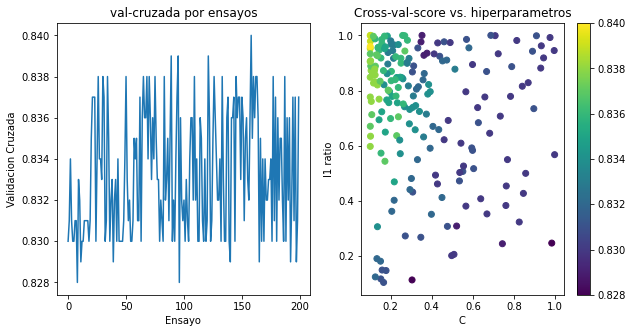

In [47]:
lr_para_keys = ["C","l1_ratio"]    # Ajuste de hiperparametros
scores, params = trial_ana(trials, lr_para_keys) # puntuacion de validacion cruzada e hiperparametros para cada ensayo

# Mapa de puntuacion
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(scores)
plt.xlabel("Ensayo")
plt.ylabel("Validacion Cruzada")
plt.title("val-cruzada por ensayos")

plt.subplot(1,2,2)
plt.scatter(x=params["C"],y=params["l1_ratio"], c=scores)
plt.colorbar()
plt.xlabel("C")
plt.ylabel("l1 ratio")
plt.title("Cross-val-score vs. hiperparametros")



---
La puntuación aumentó rápidamente en los primeros 30 ensayos realizados. Podemos ver mejores parámetros localizados en C<0.5, L1_ratio>0.5



---




model:
LogisticRegression(C=0.10068449885992915, l1_ratio=0.9594960467134047,
                   penalty='elasticnet', random_state=10, solver='saga')
para:
{'C': 0.10068449885992915, 'l1_ratio': 0.9594960467134047, 'penalty': 'elasticnet', 'random_state': 10, 'solver': 'saga'}
accuracy:
0.8286852589641435
f1_score:
0.845878136200717
report:
              precision    recall  f1-score   support

          No       0.91      0.73      0.81       124
         Yes       0.78      0.93      0.85       127

    accuracy                           0.83       251
   macro avg       0.84      0.83      0.83       251
weighted avg       0.84      0.83      0.83       251

conf_mat:
[[ 90  34]
 [  9 118]]
fpr:
[0.         0.27419355 1.        ]
tpr:
[0.         0.92913386 1.        ]
threshold:
[2. 1. 0.]
auc_score:
0.82747015494031


,cv_score,pred_score,auc_score,f1_score
LogisticRegression,0.84,0.828685,0.82747,0.845878


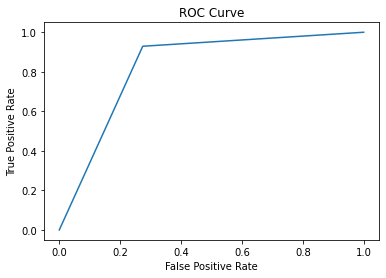

In [48]:
lr_clf_dict  = evaluate_model(lr_space, best)
for metrics, value in lr_clf_dict.items():
    if metrics =="y_pred":
        continue
    print(metrics, end = ":\n")
    print(value)
plt.plot(lr_clf_dict["fpr"], lr_clf_dict["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
lr_model_scores= pd.DataFrame([[lr_cv_score,lr_clf_dict["accuracy"],lr_clf_dict["auc_score"],
                                   lr_clf_dict["f1_score"]]],index =["LogisticRegression"], columns =score_name )
lr_model_scores



---
La precisión de la validación cruzada del conjunto en entrenamiento es aproximadamente 0.839, mientras que la precisión del conjunto en prueba es aproximadamente 0.829.
En general el rendimiento de esta generalización es bueno.


---




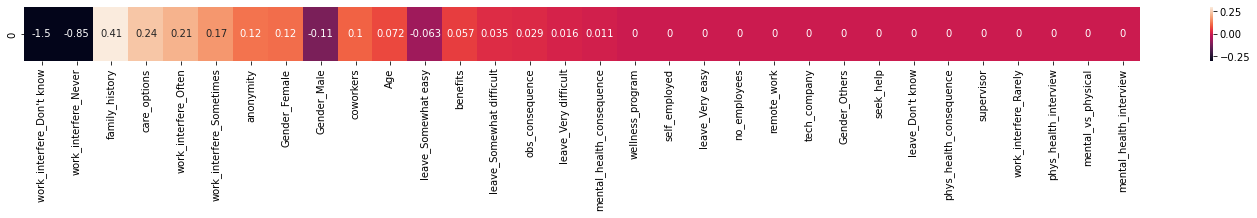

In [49]:
# coeficiente para cada caracteristica
sortind_coef = np.argsort(abs(lr_clf_dict["model"].coef_[0]))[::-1]
sorted_coef = np.expand_dims(lr_clf_dict["model"].coef_[0][sortind_coef],axis=0)
coef_df = pd.DataFrame(data = sorted_coef,columns = feature_names[sortind_coef])
plt.subplots(figsize=(25, 1))
sns.heatmap(coef_df, vmin = -.3, vmax=.3, annot=True)

# seleccionamos las 9 mejores caracteristicas si >0
lr_features = pd.DataFrame(np.zeros((1,len(df.columns)-1)), columns = feature_names, index = ["LogisticRegression"])
bool_feature= abs(sorted_coef)>0
tmp = sortind_coef[bool_feature.squeeze()]
sel_len = min(9, len(tmp))
lr_features[feature_names[sortind_coef[:sel_len]]]=1



---
Los coeficientes más elevados son: interferencia en el trabajo, antecedentes familiares, opciones de atención, anonimato, sexo, compañeros de trabajo, edad, permisos y prestaciones.
De acuerdo con la matriz de correlacion, la mayoria de estos tambien presentan una alta correlacion con la variable "treatment".




---

***K-Nearest Neighbors***


---



In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_space = {"model":KNeighborsClassifier,
         "n_neighbors": hp.choice("n_neighbors",list(range(3,40))),
         'weights':hp.choice("weights",["uniform","distance"]),
        }
trials = Trials()
best = fmin(objective, knn_space, algo=tpe.suggest, max_evals=200, trials = trials)
best_para = space_eval(knn_space, best)
knn_cv_score = -objective(best_para)
print(best_para)

100%|██████████| 200/200 [00:09<00:00, 20.32it/s, best loss: -0.8240000000000001]
{'n_neighbors': 27, 'weights': 'distance'}


Text(0.5, 1.0, 'Puntuacion-CV vs. Hiperparametro')

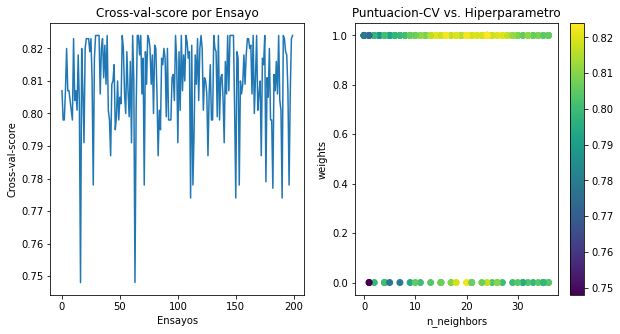

In [51]:
para_keys = ["n_neighbors","weights"]   
scores, params = trial_ana(trials, para_keys)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(scores)
plt.xlabel("Ensayos")
plt.ylabel("Cross-val-score")
plt.title("Cross-val-score por Ensayo")
plt.subplot(1,2,2)
params["weights"][params["weights"]=="distance"]=1
params["weights"][params["weights"]=="uniform"]=0
plt.scatter(x=params["n_neighbors"],y=params["weights"], c=scores)
plt.colorbar()
plt.xlabel("n_neighbors")
plt.ylabel("weights")
plt.title("Puntuacion-CV vs. Hiperparametro")



---
k en el rango de [10,30] generan mejores resultados.


---




model:
KNeighborsClassifier(n_neighbors=27, weights='distance')
para:
{'n_neighbors': 27, 'weights': 'distance'}
accuracy:
0.8087649402390438
f1_score:
0.8248175182481751
report:
              precision    recall  f1-score   support

          No       0.87      0.73      0.79       124
         Yes       0.77      0.89      0.82       127

    accuracy                           0.81       251
   macro avg       0.82      0.81      0.81       251
weighted avg       0.82      0.81      0.81       251

conf_mat:
[[ 90  34]
 [ 14 113]]
fpr:
[0.         0.27419355 1.        ]
tpr:
[0.         0.88976378 1.        ]
threshold:
[2. 1. 0.]
auc_score:
0.8077851155702311


,cv_score,pred_score,auc_score,f1_score
KNeighborsClassifier,0.824,0.808765,0.807785,0.824818


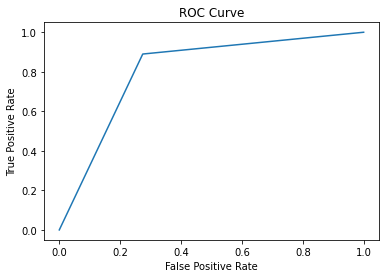

In [52]:
knn_clf_dict  = evaluate_model(knn_space, best)
for metrics, value in knn_clf_dict.items():
    if metrics =="y_pred":
        continue
    print(metrics, end = ":\n")
    print(value)
plt.plot(knn_clf_dict["fpr"], knn_clf_dict["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
knn_model_scores=pd.DataFrame([[knn_cv_score,knn_clf_dict["accuracy"],knn_clf_dict["auc_score"],
                                   knn_clf_dict["f1_score"]]],index =["KNeighborsClassifier"], columns =score_name )
knn_model_scores



---

La precisión  de validación es de 0.824, mientras que la precisíon en el conjunto de prueba es de 0.809, estos resultado son menores a los obtenidos mediante la regresíon logíca.


---





---

***Arbol de decision***



---



In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_space = {"model":DecisionTreeClassifier,
         "criterion": hp.choice("criterion", ["gini", "entropy"]),
         "splitter":hp.choice("splitter", ["best", "random"]),
         "max_depth": hp.quniform("max_depth",3, 12,1),
         "min_samples_split":hp.choice('min_samples_split',list(range(2,10))),
         "min_samples_leaf":hp.choice('min_samples_leaf',list(range(1,10))),
         "random_state": 10
        }
trials = Trials()
best = fmin(objective, dt_space, algo=tpe.suggest, max_evals=200, trials = trials)
best_para = space_eval(dt_space, best)
dt_cv_score = -objective(best_para)
print(best_para)

100%|██████████| 200/200 [00:09<00:00, 22.13it/s, best loss: -0.8379999999999999]
{'criterion': 'entropy', 'max_depth': 5.0, 'min_samples_leaf': 7, 'min_samples_split': 6, 'random_state': 10, 'splitter': 'best'}


Text(0.5, 1.0, 'Score vs. Hiperparametro')

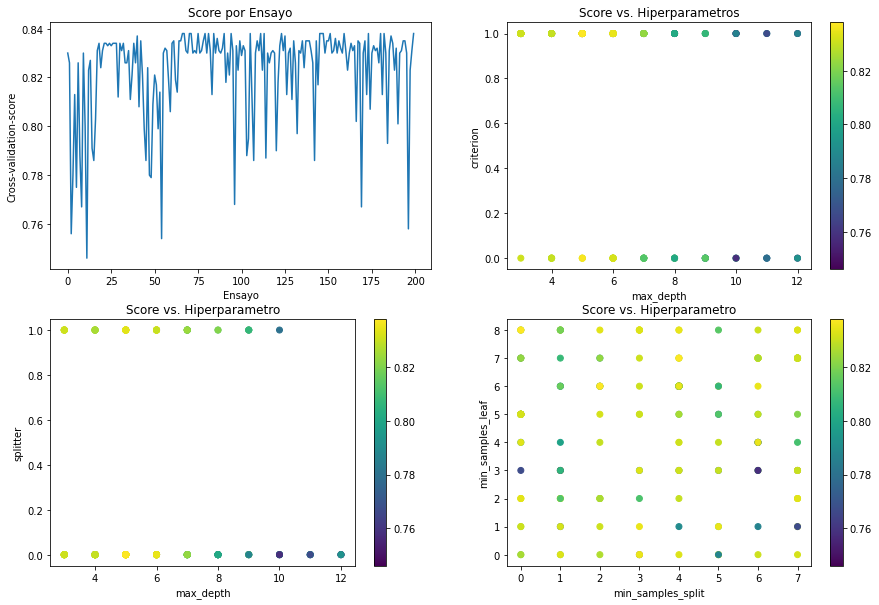

In [54]:
para_keys = ["max_depth","criterion","splitter","min_samples_split","min_samples_leaf"]   
scores, params = trial_ana(trials, para_keys)
params["criterion"][params["criterion"]=="gini"]=1
params["criterion"][params["criterion"]=="entropy"]=0
params["splitter"][params["splitter"]=="best"]=1
params["splitter"][params["splitter"]=="random"]=0

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(scores)
plt.xlabel("Ensayo")
plt.ylabel("Cross-validation-score")
plt.title("Score por Ensayo")

plt.subplot(2,2,2)
plt.scatter(x=params["max_depth"],y=params["criterion"], c=scores)
plt.colorbar()
plt.xlabel("max_depth")
plt.ylabel("criterion")
plt.title("Score vs. Hiperparametros")

plt.subplot(2,2,3)
plt.scatter(x=params["max_depth"],y=params["splitter"], c=scores)
plt.colorbar()
plt.xlabel("max_depth")
plt.ylabel("splitter")
plt.title("Score vs. Hiperparametro")

plt.subplot(2,2,4)
plt.scatter(x=params["min_samples_split"],y=params["min_samples_leaf"], c=scores)
plt.colorbar()
plt.xlabel("min_samples_split")
plt.ylabel("min_samples_leaf")
plt.title("Score vs. Hiperparametro")



---
Se observa cuando max_dpth es menor a 8 se obtienen mejores resultados.



---




model:
DecisionTreeClassifier(criterion='entropy', max_depth=5.0, min_samples_leaf=7,
                       min_samples_split=6, random_state=10)
para:
{'criterion': 'entropy', 'max_depth': 5.0, 'min_samples_leaf': 7, 'min_samples_split': 6, 'random_state': 10, 'splitter': 'best'}
accuracy:
0.8247011952191236
f1_score:
0.8394160583941606
report:
              precision    recall  f1-score   support

          No       0.88      0.74      0.81       124
         Yes       0.78      0.91      0.84       127

    accuracy                           0.82       251
   macro avg       0.83      0.82      0.82       251
weighted avg       0.83      0.82      0.82       251

conf_mat:
[[ 92  32]
 [ 12 115]]
fpr:
[0.         0.25806452 1.        ]
tpr:
[0.         0.90551181 1.        ]
threshold:
[2. 1. 0.]
auc_score:
0.8237236474472949


,cv_score,pred_score,auc_score,f1_score
DecisionTreeClassifier,0.838,0.824701,0.823724,0.839416


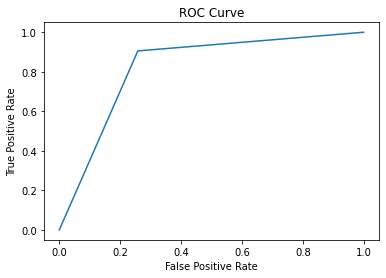

In [55]:
dt_clf_dict  = evaluate_model(dt_space, best)
for metrics, value in dt_clf_dict.items():
    if metrics =="y_pred":
        continue
    print(metrics, end = ":\n")
    print(value)
plt.plot(dt_clf_dict["fpr"], dt_clf_dict["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

dt_model_scores=pd.DataFrame([[dt_cv_score,dt_clf_dict["accuracy"],dt_clf_dict["auc_score"],dt_clf_dict["f1_score"]]],
                           index =["DecisionTreeClassifier"], columns =score_name )
dt_model_scores



---

La precisión de la validacion cruzada es de 0.841, mientras que la precisión del conjunto de prueba es de 0.825, lo cual se observa un rendimiento similar al de la regresión logística.



---



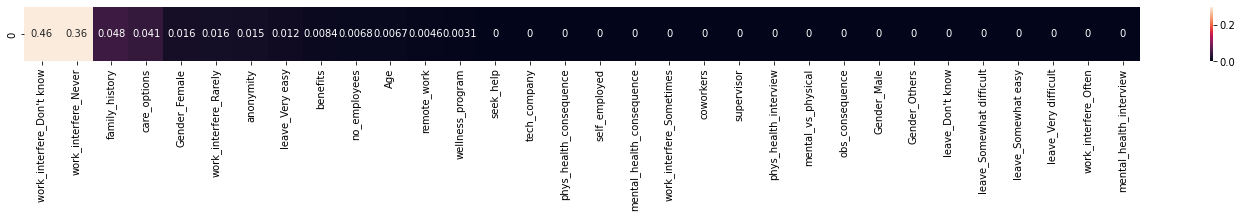

In [56]:
sortind_dt_feat_imp = np.argsort(dt_clf_dict["model"].feature_importances_)[::-1]
sorted_dt_feat_imp = np.expand_dims(dt_clf_dict["model"].feature_importances_[sortind_dt_feat_imp],axis=0)
dt_feat_imp_df = pd.DataFrame(data = sorted_dt_feat_imp,columns = feature_names[sortind_dt_feat_imp])
plt.subplots(figsize=(25, 1))
sns.heatmap(dt_feat_imp_df, vmin = 0, vmax=.3, annot=True)

# Seleccionamos las 9 caracteristicas principales si >0
dt_features = pd.DataFrame(np.zeros((1,len(df.columns)-1)), columns = feature_names, index = ["DecisionTreeClassifier"])
bool_feature= abs(sorted_dt_feat_imp)>0
tmp = sortind_dt_feat_imp[bool_feature.squeeze()]
sel_len = min(9, len(tmp))
dt_features[feature_names[sortind_dt_feat_imp[:sel_len]]]=1



---
La caracteristica "work interfere" continua siendo la más importante. 
Otras caracteristicas importantes son los antecedentes familiares, las opciones de cuidados, la edad, etc.



---






---

***Random Forest***


---



In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_space = {"model":RandomForestClassifier,
         "n_estimators":hp.choice('n_estimators',np.arange(20,200,10)),
         "max_depth": hp.quniform("max_depth",2, 20,1),
         "criterion": hp.choice("criterion", ["gini", "entropy"]),
         "min_samples_split":hp.choice('min_samples_split',list(range(2,10))),
         "min_samples_leaf":hp.choice('min_samples_leaf',list(range(1,10))),
         "oob_score": True,
         "random_state": 10
        }
trials = Trials()
best = fmin(objective, rf_space, algo=tpe.suggest, max_evals=200, trials = trials)
best_para = space_eval(rf_space, best)
rf_cv_score= -objective(best_para)
print(best_para)

100%|██████████| 200/200 [03:34<00:00,  1.07s/it, best loss: -0.844]
{'criterion': 'gini', 'max_depth': 8.0, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50, 'oob_score': True, 'random_state': 10}


Text(0.5, 1.0, 'Cross-val-score vs. Hiperparametros')

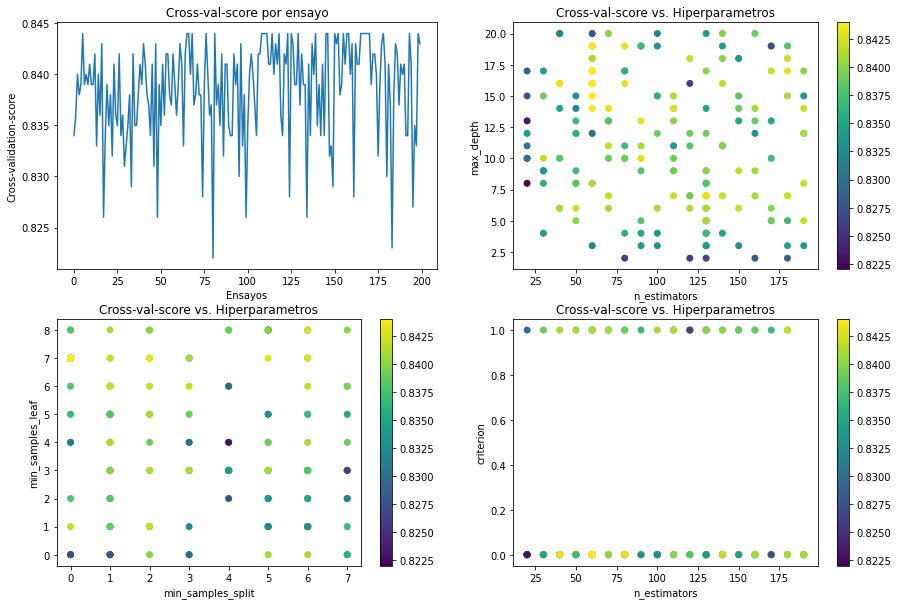

In [58]:
para_keys = ["n_estimators","max_depth","criterion","min_samples_split","min_samples_leaf"]   
scores, params = trial_ana(trials, para_keys)
params["criterion"][params["criterion"]=="gini"]=1
params["criterion"][params["criterion"]=="entropy"]=0
n_estimator_range = np.arange(20,200,10)

# Visualizacion
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(scores)
plt.xlabel("Ensayos")
plt.ylabel("Cross-validation-score")
plt.title("Cross-val-score por ensayo")

plt.subplot(2,2,2)
plt.scatter(x=n_estimator_range[params["n_estimators"]],y=params["max_depth"], c=scores)
plt.colorbar()
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Cross-val-score vs. Hiperparametros")

plt.subplot(2,2,3)
plt.scatter(x=params["min_samples_split"],y=params["min_samples_leaf"], c=scores)
plt.colorbar()
plt.xlabel("min_samples_split")
plt.ylabel("min_samples_leaf")
plt.title("Cross-val-score vs. Hiperparametros")

plt.subplot(2,2,4)
plt.scatter(x=n_estimator_range[params["n_estimators"]],y=params["criterion"], c=scores)
plt.colorbar()
plt.xlabel("n_estimators")
plt.ylabel("criterion")
plt.title("Cross-val-score vs. Hiperparametros")



---

En general mayor n_estimater y max_depght, min_sample_leaf generan mejores resultados.


---



model:
RandomForestClassifier(max_depth=8.0, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=50, oob_score=True, random_state=10)
para:
{'criterion': 'gini', 'max_depth': 8.0, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50, 'oob_score': True, 'random_state': 10}
accuracy:
0.8207171314741036
f1_score:
0.8363636363636363
report:
              precision    recall  f1-score   support

          No       0.88      0.73      0.80       124
         Yes       0.78      0.91      0.84       127

    accuracy                           0.82       251
   macro avg       0.83      0.82      0.82       251
weighted avg       0.83      0.82      0.82       251

conf_mat:
[[ 91  33]
 [ 12 115]]
fpr:
[0.         0.26612903 1.        ]
tpr:
[0.         0.90551181 1.        ]
threshold:
[2. 1. 0.]
auc_score:
0.8196913893827787


,cv_score,pred_score,auc_score,f1_score
RandomForestClassifier,0.844,0.820717,0.819691,0.836364


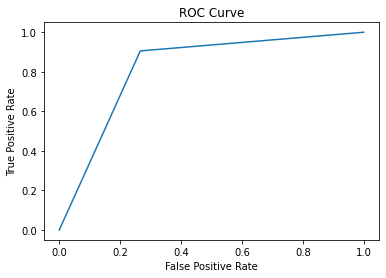

In [59]:
rf_clf_dict  = evaluate_model(rf_space, best)
for metrics, value in rf_clf_dict.items():
    if metrics =="y_pred":
        continue
    print(metrics, end = ":\n")
    print(value)
plt.plot(rf_clf_dict["fpr"], rf_clf_dict["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
rf_model_scores=pd.DataFrame([[rf_cv_score,rf_clf_dict["accuracy"],rf_clf_dict["auc_score"],
                             rf_clf_dict["f1_score"]]],index =["RandomForestClassifier"], columns =score_name )
rf_model_scores



---

La precisión de la validacion cruzada en el conjunto de entrenamiento es de 0.844, y la precisión en el conjunto de prueba es de 0.825.



---



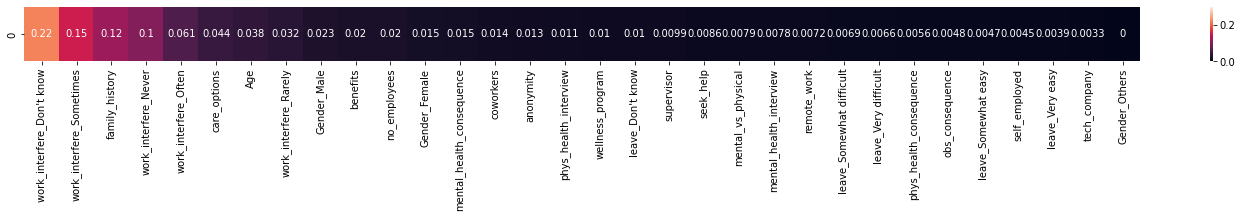

In [60]:
sortind_rf_feat_imp = np.argsort(rf_clf_dict["model"].feature_importances_)[::-1]
sorted_rf_feat_imp = np.expand_dims(rf_clf_dict["model"].feature_importances_[sortind_rf_feat_imp],axis=0)
feat_rf_imp_df = pd.DataFrame(data = sorted_rf_feat_imp,columns = feature_names[sortind_rf_feat_imp])
plt.subplots(figsize=(25, 1))
sns.heatmap(feat_rf_imp_df, vmin = 0, vmax=.3, annot=True)

# Seleccionamos las 9 caracteristicas principales si >0
rf_features = pd.DataFrame(np.zeros((1,len(df.columns)-1)), columns = feature_names, index = ["RandomForestClassifier"])
bool_feature= abs(sorted_rf_feat_imp)>0
tmp = sortind_rf_feat_imp[bool_feature.squeeze()]
sel_len = min(9, len(tmp))
rf_features[feature_names[sortind_rf_feat_imp[:sel_len]]]=1



---

Las características más importantes siguen siendo: *interferencia laboral, antecedentes familiares, opciones de atención, sexo, edad, prestación.*



---





---

***AdaBoost Classifier***


---



In [61]:
from sklearn.ensemble import AdaBoostClassifier
ab_space = {"model":AdaBoostClassifier,
         "n_estimators":hp.choice('n_estimators',np.arange(10,200,10)),
         "learning_rate": hp.uniform("learning_rate",0.1, 1),
         "random_state": 10
        }
trials = Trials()
best = fmin(objective, ab_space, algo=tpe.suggest, max_evals=200, trials = trials)
best_para = space_eval(ab_space, best)
ab_cv_score = -objective(best_para)
print(best_para)


100%|██████████| 200/200 [03:31<00:00,  1.06s/it, best loss: -0.836]
{'learning_rate': 0.2634425877229325, 'n_estimators': 80, 'random_state': 10}


Text(0.5, 1.0, 'Cross-val-score vs. Hiperparametros')

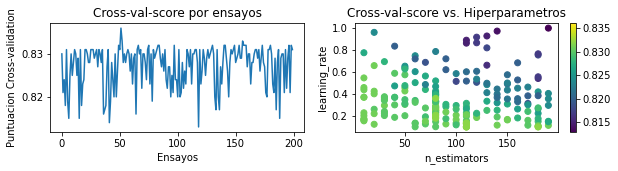

In [62]:
para_keys = ["n_estimators","learning_rate"]   
scores, params = trial_ana(trials, para_keys)
n_estimator_range = np.arange(10,200,10)
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(scores)
plt.xlabel("Ensayos")
plt.ylabel("Puntuacion Cross-validation")
plt.title("Cross-val-score por ensayos")

plt.subplot(1,2,2)
plt.scatter(x=n_estimator_range[params["n_estimators"]],y=params["learning_rate"], c=scores)
plt.colorbar()
plt.xlabel("n_estimators")
plt.ylabel("learning_rate")
plt.title("Cross-val-score vs. Hiperparametros")



---

Los mejores resultados de los Hiperparametros son aquellos que se situan en la conbinación de menos n_stimators  y menor taza de aprendizaje. 


---



model:
AdaBoostClassifier(learning_rate=0.2634425877229325, n_estimators=80,
                   random_state=10)
para:
{'learning_rate': 0.2634425877229325, 'n_estimators': 80, 'random_state': 10}
accuracy:
0.8286852589641435
f1_score:
0.8447653429602889
report:
              precision    recall  f1-score   support

          No       0.90      0.73      0.81       124
         Yes       0.78      0.92      0.84       127

    accuracy                           0.83       251
   macro avg       0.84      0.83      0.83       251
weighted avg       0.84      0.83      0.83       251

conf_mat:
[[ 91  33]
 [ 10 117]]
fpr:
[0.         0.26612903 1.        ]
tpr:
[0.         0.92125984 1.        ]
threshold:
[2. 1. 0.]
auc_score:
0.8275654051308102


,cv_score,pred_score,auc_score,f1_score
AdaBoostClassifier,0.836,0.828685,0.827565,0.844765


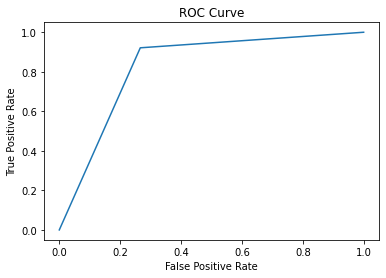

In [63]:
ab_clf_dict  = evaluate_model(ab_space, best)
for metrics, value in ab_clf_dict.items():
    if metrics =="y_pred":
        continue
    print(metrics, end = ":\n")
    print(value)
plt.plot(ab_clf_dict["fpr"], ab_clf_dict["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
ab_model_scores=pd.DataFrame([[ab_cv_score,ab_clf_dict["accuracy"],ab_clf_dict["auc_score"],
                                   ab_clf_dict["f1_score"]]],index =["AdaBoostClassifier"], columns =score_name )
ab_model_scores



---
La precisión de la validación cruzada es de 0.836, y la del conjunto de prueba es de 0.829.


---




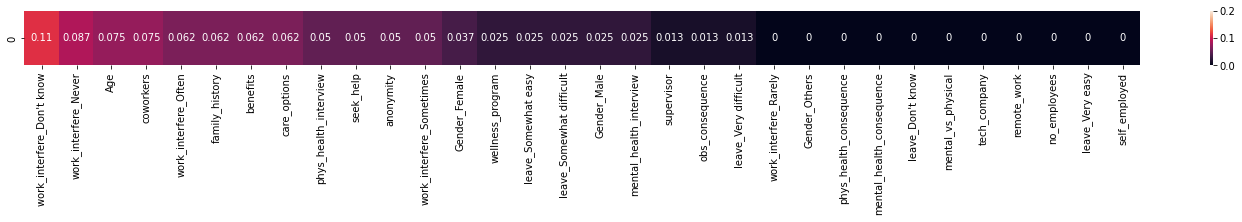

In [64]:
sortind_ab_feat_imp = np.argsort(ab_clf_dict["model"].feature_importances_)[::-1]
sorted_ab_feat_imp = np.expand_dims(ab_clf_dict["model"].feature_importances_[sortind_ab_feat_imp],axis=0)
ab_feat_imp_df = pd.DataFrame(data = sorted_ab_feat_imp,columns = feature_names[sortind_ab_feat_imp])
plt.subplots(figsize=(25, 1))
sns.heatmap(ab_feat_imp_df, vmin = 0, vmax=.2, annot=True)

# Seleccionamos las 9 caracteristicas principales si >0
ab_features = pd.DataFrame(np.zeros((1,len(df.columns)-1)), columns = feature_names, index = ["AdaBoostClassifier"])
bool_feature= abs(sorted_ab_feat_imp)>0
tmp = sortind_ab_feat_imp[bool_feature.squeeze()]
sel_len = min(9, len(tmp))
ab_features[feature_names[sortind_ab_feat_imp[:sel_len]]]=1



---

Entre las características importantes se incluyen: *edad, interferencia laboral, sexo, antecedentes familiares, prestaciones, opciones de asistencia, buscar ayuda, anonimato, compañeros de trabajo, entrevista salud física, baja laboral.*



---





---

***Gradient Boosting Classfier***


---



In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb_space = {"model":GradientBoostingClassifier,
         "n_estimators":hp.choice('n_estimators',np.arange(50,500,50)),
         "max_depth":hp.choice('max_depth',list(range(2,10))),
         "learning_rate": hp.loguniform("learning_rate",np.log(1e-3), np.log(1e-1)),
         "subsample": hp.uniform("subsample",0.7,1),
         "min_samples_split":hp.choice('min_samples_split',list(range(2,10))),
         "min_samples_leaf":hp.choice('min_samples_leaf',list(range(1,10))),
         "random_state": 10
        }
trials = Trials()
best = fmin(objective, gb_space, algo=tpe.suggest, max_evals=200, trials = trials)
best_para = space_eval(gb_space, best)
gb_cv_score = -objective(best_para)
print(best_para)

100%|██████████| 200/200 [12:03<00:00,  3.62s/it, best loss: -0.843]
{'learning_rate': 0.005378877816016955, 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 100, 'random_state': 10, 'subsample': 0.7852426330698286}


Text(0.5, 1.0, 'Puntuacion vs. Hiperparametros')

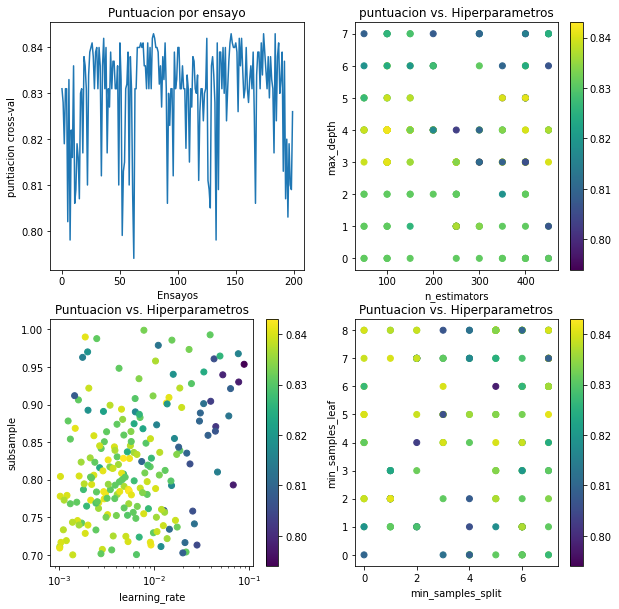

In [66]:
para_keys = ["n_estimators","max_depth","learning_rate","subsample","min_samples_split","min_samples_leaf"]   
scores, params = trial_ana(trials, para_keys)
n_estimator_range = np.arange(50,500,50)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(scores)
plt.xlabel("Ensayos")
plt.ylabel("puntiacion cross-val")
plt.title("Puntuacion por ensayo")

plt.subplot(2,2,2)
plt.scatter(x=n_estimator_range[params["n_estimators"]],y=params["max_depth"], c=scores)
plt.colorbar()
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("puntuacion vs. Hiperparametros")

plt.subplot(2,2,3)
ax = plt.gca()
ax.scatter(x=params["learning_rate"],y=params["subsample"], c=scores)
ax.set_xscale('log')
plt.colorbar()
plt.xlabel("learning_rate")
plt.ylabel("subsample")
plt.title("Puntuacion vs. Hiperparametros")

plt.subplot(2,2,4)
plt.scatter(x=params["min_samples_split"],y=params["min_samples_leaf"], c=scores)
plt.colorbar()
plt.xlabel("min_samples_split")
plt.ylabel("min_samples_leaf")
plt.title("Puntuacion vs. Hiperparametros")



---
A partir de los resultados anteriores, podemos ver que la seleccion de la "taza de aprendizaje" (Learning_rate) es critica en este caso (inferior). Max_depth y n_estimator en un rango de menor valor generarán mejores resultados.


---




model:
GradientBoostingClassifier(learning_rate=0.005378877816016955, max_depth=6,
                           min_samples_leaf=9, min_samples_split=7,
                           random_state=10, subsample=0.7852426330698286)
para:
{'learning_rate': 0.005378877816016955, 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 100, 'random_state': 10, 'subsample': 0.7852426330698286}
accuracy:
0.8286852589641435
f1_score:
0.8436363636363636
report:
              precision    recall  f1-score   support

          No       0.89      0.74      0.81       124
         Yes       0.78      0.91      0.84       127

    accuracy                           0.83       251
   macro avg       0.84      0.83      0.83       251
weighted avg       0.84      0.83      0.83       251

conf_mat:
[[ 92  32]
 [ 11 116]]
fpr:
[0.         0.25806452 1.        ]
tpr:
[0.         0.91338583 1.        ]
threshold:
[2. 1. 0.]
auc_score:
0.8276606553213107


,cv_score,pred_score,auc_score,f1_score
GradientBoostingClassifier,0.843,0.828685,0.827661,0.843636


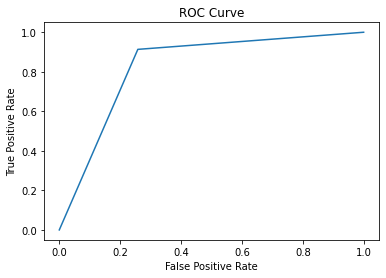

In [67]:
gb_clf_dict  = evaluate_model(gb_space, best)
for metrics, value in gb_clf_dict.items():
    if metrics =="y_pred":
        continue
    print(metrics, end = ":\n")
    print(value)
plt.plot(gb_clf_dict["fpr"], gb_clf_dict["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
gb_model_scores=pd.DataFrame([[gb_cv_score,gb_clf_dict["accuracy"],gb_clf_dict["auc_score"],
                                   gb_clf_dict["f1_score"]]],index =["GradientBoostingClassifier"], columns =score_name )
gb_model_scores



---
La precisión de la validacion cruzada en el conjunto de entrenamiento es de 0.842 y la precisión en el conjunto de prueba es de 0.829.


---




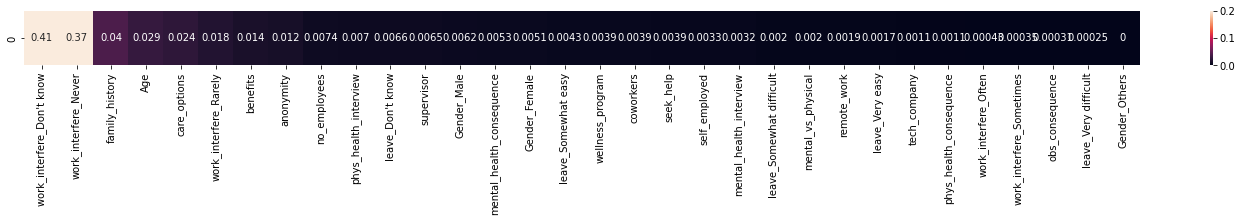

In [68]:
sortind_gb_feat_imp = np.argsort(gb_clf_dict["model"].feature_importances_)[::-1]
sorted_gb_feat_imp = np.expand_dims(gb_clf_dict["model"].feature_importances_[sortind_gb_feat_imp],axis=0)
gb_feat_imp_df = pd.DataFrame(data = sorted_gb_feat_imp,columns = feature_names[sortind_gb_feat_imp])
plt.subplots(figsize=(25, 1))
sns.heatmap(gb_feat_imp_df, vmin = 0, vmax=.2, annot=True)

#  Seleccionamos las 9 caracteristicas principales si >0

gb_features = pd.DataFrame(np.zeros((1,len(df.columns)-1)), columns = feature_names, index = ["GradientBoostingClassifier"])
bool_feature= abs(sorted_gb_feat_imp)>0
tmp = sortind_gb_feat_imp[bool_feature.squeeze()]
sel_len = min(9, len(tmp))
gb_features[feature_names[sortind_gb_feat_imp[:sel_len]]]=1



---
La característica más importante sigue siendo: *work interfere*.
Otras son: *age, care options, family history, number of employees, supervisor, phys_health_consequence, mental_health_consequence etc.*

**Luego de realizar el ajuste de los hiperparametros, estos momdelos generan resultados similares, salvo el recibido por KNN el cual parece mas débil.**



---

***Realizamos un resumen de los rendimientos de los  modelos ***



---



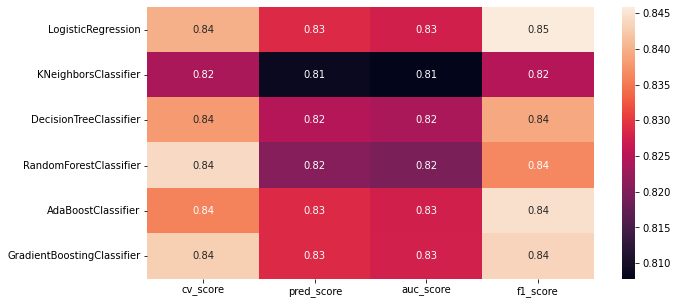

In [71]:
model_scores = pd.concat([lr_model_scores, knn_model_scores, dt_model_scores, rf_model_scores, ab_model_scores, gb_model_scores])
plt.subplots(figsize=(10, 5))
sns.heatmap(model_scores, annot=True)



---



---
# **Modelo con algunas caracteristicas seleccionadas**


---



---



Para realizar esto se toma caracteristicas mas relevantes de la matriz de correlaciones y de los modelos anteriores.

In [72]:
feature_counts = pd.concat([corr_features,lr_features, dt_features, rf_features, ab_features, gb_features])
feature_counts

,Age,self_employed,family_history,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,...,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,work_interfere_Don't know,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
corr,0.0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
LogisticRegression,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
DecisionTreeClassifier,0.0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
RandomForestClassifier,1.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
AdaBoostClassifier,1.0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
GradientBoostingClassifier,1.0,0.0,1,1.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [73]:
feature_counts.sum().sort_values(ascending=False)

family_history               6.0
care_options                 6.0
work_interfere_Never         5.0
work_interfere_Don't know    5.0
work_interfere_Rarely        4.0
work_interfere_Often         4.0
benefits                     4.0
Age                          3.0
anonymity                    3.0
Gender_Female                3.0
work_interfere_Sometimes     3.0
Gender_Male                  2.0
mental_health_consequence    1.0
obs_consequence              1.0
no_employees                 1.0
leave_Very easy              1.0
phys_health_interview        1.0
coworkers                    1.0
mental_vs_physical           0.0
self_employed                0.0
seek_help                    0.0
mental_health_interview      0.0
phys_health_consequence      0.0
leave_Don't know             0.0
leave_Somewhat difficult     0.0
leave_Somewhat easy          0.0
leave_Very difficult         0.0
supervisor                   0.0
wellness_program             0.0
tech_company                 0.0
remote_wor



---


Las 12 caracteristicas mas votadas


---



In [74]:
n_sel=12
feature_sel = feature_counts.sum().nlargest(n_sel).index
feature_sel

Index(['family_history', 'care_options', 'work_interfere_Don't know',
       'work_interfere_Never', 'benefits', 'work_interfere_Often',
       'work_interfere_Rarely', 'Age', 'anonymity', 'Gender_Female',
       'work_interfere_Sometimes', 'Gender_Male'],
      dtype='object')



---
Puesto que hay características que son irrelevantes y características correlacionadas. El utilizar menos de estas puede acelerar el entrenamiento y evitar que se lleve a un ajuste excesivo. 

A continuacion se utilizara estas características seleccionadas para entrenar a los modelos.


---




In [75]:
# Logistic Regression
best = fmin(objective, lr_space, algo=tpe.suggest, max_evals=200, trials = Trials())
best_para = space_eval(lr_space, best)
lr_cv_score_feature_sel= -objective(best_para) 
lr_clf_dict_feature_sel  = evaluate_model(lr_space, best)
lr_model_scores_feature_sel = pd.DataFrame([[lr_cv_score_feature_sel,lr_clf_dict_feature_sel["accuracy"],lr_clf_dict_feature_sel["auc_score"],
                                               lr_clf_dict_feature_sel["f1_score"]]],index =["LogisticRegression"], columns =score_name )

# KNN
best = fmin(objective, knn_space, algo=tpe.suggest, max_evals=200, trials = Trials())
best_para = space_eval(knn_space, best)
knn_cv_score_feature_sel= -objective(best_para) 
knn_clf_dict_feature_sel  = evaluate_model(knn_space, best)
knn_model_scores_feature_sel= pd.DataFrame([[knn_cv_score_feature_sel,knn_clf_dict_feature_sel["accuracy"],knn_clf_dict_feature_sel["auc_score"],
                                               knn_clf_dict_feature_sel["f1_score"]]],index =["KNeighborsClassifier"], columns =score_name )

# Decision Tree
best = fmin(objective, dt_space, algo=tpe.suggest, max_evals=200, trials = Trials())
best_para = space_eval(dt_space, best)
dt_cv_score_feature_sel= -objective(best_para) 
dt_clf_dict_feature_sel  = evaluate_model(dt_space, best)
dt_model_scores_feature_sel=pd.DataFrame([[dt_cv_score_feature_sel,dt_clf_dict_feature_sel["accuracy"],dt_clf_dict_feature_sel["auc_score"],
                                               dt_clf_dict_feature_sel["f1_score"]]],index =["DecisionTreeClassifier"], columns =score_name )

# Random Forest
best = fmin(objective, rf_space, algo=tpe.suggest, max_evals=200, trials = Trials())
best_para = space_eval(rf_space, best)
rf_cv_score_feature_sel= -objective(best_para) 
rf_clf_dict_feature_sel  = evaluate_model(rf_space, best)
rf_model_scores_feature_sel = pd.DataFrame([[rf_cv_score_feature_sel,rf_clf_dict_feature_sel["accuracy"],rf_clf_dict_feature_sel["auc_score"],
                                               rf_clf_dict_feature_sel["f1_score"]]],index =["RandomForestClassifier"], columns =score_name )

# Adaboosting
best = fmin(objective, ab_space, algo=tpe.suggest, max_evals=200, trials = Trials())
best_para = space_eval(ab_space, best)
ab_cv_score_feature_sel= -objective(best_para) 
ab_clf_dict_feature_sel  = evaluate_model(ab_space, best)
ab_model_scores_feature_sel = pd.DataFrame([[ab_cv_score_feature_sel,ab_clf_dict_feature_sel["accuracy"],ab_clf_dict_feature_sel["auc_score"],
                                               ab_clf_dict_feature_sel["f1_score"]]],index =["AdaBoostClassifier"], columns =score_name )

# Gradient Boosting
best = fmin(objective, gb_space, algo=tpe.suggest, max_evals=200, trials = Trials())
best_para = space_eval(gb_space, best)
gb_cv_score_feature_sel= -objective(best_para) 
gb_clf_dict_feature_sel  = evaluate_model(gb_space, best)
gb_model_scores_feature_sel = pd.DataFrame([[gb_cv_score_feature_sel,gb_clf_dict_feature_sel["accuracy"],gb_clf_dict_feature_sel["auc_score"],
                                               gb_clf_dict_feature_sel["f1_score"]]],index =["GradientBoostingClassifier"], columns =score_name )

model_scores_feature_sel = pd.concat([lr_model_scores_feature_sel,knn_model_scores_feature_sel, dt_model_scores_feature_sel, 
                                      rf_model_scores_feature_sel, ab_model_scores_feature_sel, gb_model_scores_feature_sel])

  0%|          | 1/200 [00:00<00:43,  4.53it/s, best loss: -0.8280000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  1%|          | 2/200 [00:00<00:50,  3.91it/s, best loss: -0.8300000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  2%|▏         | 3/200 [00:00<00:52,  3.78it/s, best loss: -0.8300000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  2%|▏         | 4/200 [00:01<00:50,  3.91it/s, best loss: -0.8300000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  3%|▎         | 6/200 [00:01<00:46,  4.17it/s, best loss: -0.8320000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

  4%|▎         | 7/200 [00:01<00:48,  3.97it/s, best loss: -0.8320000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  4%|▍         | 8/200 [00:02<00:49,  3.87it/s, best loss: -0.8320000000000001]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  4%|▍         | 9/200 [00:02<00:50,  3.78it/s, best loss: -0.833]             

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  5%|▌         | 10/200 [00:02<00:50,  3.78it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 11/200 [00:02<00:49,  3.78it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

  6%|▌         | 12/200 [00:03<00:50,  3.74it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▋         | 13/200 [00:03<00:47,  3.97it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  7%|▋         | 14/200 [00:03<00:47,  3.91it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 15/200 [00:03<00:45,  4.04it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 16/200 [00:04<00:46,  3.94it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 17/200 [00:04<00:47,  3.86it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  9%|▉         | 18/200 [00:04<00:43,  4.17it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 10%|▉         | 19/200 [00:04<00:44,  4.04it/s, best loss: -0.833]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 10%|█         | 21/200 [00:05<00:37,  4.75it/s, best loss: -0.837]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 14%|█▎        | 27/200 [00:06<00:29,  5.90it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 14%|█▍        | 29/200 [00:06<00:30,  5.53it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 15%|█▌        | 30/200 [00:06<00:33,  5.01it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 31/200 [00:07<00:36,  4.63it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 17%|█▋        | 34/200 [00:07<00:37,  4.49it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 35/200 [00:07<00:34,  4.83it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 36/200 [00:08<00:36,  4.48it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 19%|█▉        | 38/200 [00:08<00:32,  5.05it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|█▉        | 39/200 [00:08<00:36,  4.47it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 41/200 [00:09<00:32,  4.90it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 21%|██        | 42/200 [00:09<00:35,  4.42it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 43/200 [00:09<00:37,  4.15it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 44/200 [00:09<00:38,  4.02it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▎       | 45/200 [00:10<00:38,  4.02it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 23%|██▎       | 46/200 [00:10<00:39,  3.90it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 24%|██▎       | 47/200 [00:10<00:40,  3.75it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 48/200 [00:11<00:39,  3.84it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 24%|██▍       | 49/200 [00:11<00:39,  3.79it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 25%|██▌       | 50/200 [00:11<00:40,  3.70it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 26%|██▌       | 52/200 [00:12<00:37,  3.97it/s, best loss: -0.8379999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 26%|██▋       | 53/200 [00:12<00:37,  3.93it/s, best loss: -0.8379999999999999]

 28%|██▊       | 55/200 [00:12<00:35,  4.13it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 56/200 [00:13<00:36,  3.97it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 57/200 [00:13<00:36,  3.88it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 29%|██▉       | 58/200 [00:13<00:37,  3.79it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|██▉       | 59/200 [00:13<00:37,  3.73it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 60/200 [00:14<00:37,  3.73it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 30%|███       | 61/200 [00:14<00:38,  3.63it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 31%|███       | 62/200 [00:14<00:38,  3.62it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 63/200 [00:14<00:34,  3.93it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 64/200 [00:15<00:35,  3.83it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▎      | 65/200 [00:15<00:36,  3.72it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 33%|███▎      | 66/200 [00:15<00:36,  3.70it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 34%|███▎      | 67/200 [00:15<00:34,  3.87it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 34%|███▍      | 69/200 [00:16<00:25,  5.05it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 36%|███▌      | 71/200 [00:16<00:24,  5.17it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 36%|███▌      | 72/200 [00:17<00:33,  3.87it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 38%|███▊      | 76/200 [00:18<00:39,  3.11it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 38%|███▊      | 77/200 [00:18<00:45,  2.72it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 39%|███▉      | 78/200 [00:19<00:48,  2.51it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 81/200 [00:20<00:36,  3.24it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 41%|████      | 82/200 [00:20<00:35,  3.34it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▏     | 83/200 [00:20<00:34,  3.38it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▏     | 84/200 [00:20<00:33,  3.44it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 42%|████▎     | 85/200 [00:21<00:33,  3.47it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 43%|████▎     | 86/200 [00:21<00:32,  3.52it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▎     | 87/200 [00:21<00:31,  3.56it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 44%|████▍     | 88/200 [00:22<00:31,  3.55it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 44%|████▍     | 89/200 [00:22<00:30,  3.58it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 45%|████▌     | 90/200 [00:22<00:30,  3.59it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▌     | 91/200 [00:22<00:30,  3.57it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 46%|████▌     | 92/200 [00:23<00:29,  3.60it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 47%|████▋     | 94/200 [00:23<00:26,  4.05it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 96/200 [00:23<00:22,  4.72it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 49%|████▉     | 98/200 [00:24<00:21,  4.67it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|████▉     | 99/200 [00:24<00:18,  5.36it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 100/200 [00:24<00:21,  4.60it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 51%|█████     | 102/200 [00:25<00:19,  5.02it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▏    | 104/200 [00:25<00:18,  5.14it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 52%|█████▎    | 105/200 [00:25<00:17,  5.47it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 53%|█████▎    | 106/200 [00:26<00:19,  4.79it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 54%|█████▎    | 107/200 [00:26<00:21,  4.36it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 54%|█████▍    | 108/200 [00:26<00:22,  4.07it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 55%|█████▍    | 109/200 [00:26<00:23,  3.89it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 55%|█████▌    | 110/200 [00:27<00:24,  3.75it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 111/200 [00:27<00:23,  3.72it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▌    | 112/200 [00:27<00:23,  3.68it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 56%|█████▋    | 113/200 [00:27<00:23,  3.71it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 57%|█████▋    | 114/200 [00:28<00:23,  3.67it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 57%|█████▊    | 115/200 [00:28<00:23,  3.60it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 116/200 [00:28<00:23,  3.55it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|█████▉    | 119/200 [00:29<00:16,  4.94it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 120/200 [00:29<00:18,  4.37it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 121/200 [00:29<00:19,  4.06it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 62%|██████▏   | 124/200 [00:30<00:15,  4.89it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 63%|██████▎   | 126/200 [00:30<00:16,  4.60it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 129/200 [00:31<00:14,  5.05it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 65%|██████▌   | 130/200 [00:31<00:15,  4.48it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 131/200 [00:32<00:16,  4.16it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▌   | 132/200 [00:32<00:15,  4.50it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 66%|██████▋   | 133/200 [00:32<00:16,  4.18it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 67%|██████▋   | 134/200 [00:32<00:16,  3.94it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 135/200 [00:33<00:17,  3.78it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 137/200 [00:33<00:14,  4.49it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 69%|██████▉   | 138/200 [00:33<00:14,  4.15it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|██████▉   | 139/200 [00:34<00:15,  3.95it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 140/200 [00:34<00:15,  3.81it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 141/200 [00:34<00:15,  3.72it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 71%|███████   | 142/200 [00:34<00:16,  3.60it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 72%|███████▏  | 143/200 [00:35<00:16,  3.55it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 72%|███████▏  | 144/200 [00:35<00:15,  3.53it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 74%|███████▍  | 148/200 [00:36<00:10,  5.11it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 74%|███████▍  | 149/200 [00:36<00:11,  4.49it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 75%|███████▌  | 150/200 [00:36<00:11,  4.25it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 76%|███████▌  | 152/200 [00:37<00:11,  4.29it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 77%|███████▋  | 154/200 [00:37<00:09,  4.75it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 78%|███████▊  | 155/200 [00:37<00:08,  5.32it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 78%|███████▊  | 156/200 [00:38<00:09,  4.57it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 78%|███████▊  | 157/200 [00:38<00:10,  4.17it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 79%|███████▉  | 158/200 [00:38<00:10,  3.97it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 160/200 [00:38<00:08,  4.72it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 161/200 [00:39<00:08,  4.48it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 82%|████████▏ | 163/200 [00:39<00:07,  4.67it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 82%|████████▏ | 164/200 [00:39<00:08,  4.24it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 82%|████████▎ | 165/200 [00:40<00:08,  3.98it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 83%|████████▎ | 166/200 [00:40<00:08,  3.86it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 84%|████████▎ | 167/200 [00:40<00:08,  3.76it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 86%|████████▌ | 171/200 [00:41<00:06,  4.69it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 86%|████████▋ | 173/200 [00:42<00:05,  4.80it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 87%|████████▋ | 174/200 [00:42<00:05,  5.06it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 175/200 [00:42<00:05,  4.50it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 176/200 [00:42<00:05,  4.12it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 88%|████████▊ | 177/200 [00:43<00:05,  3.91it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 89%|████████▉ | 178/200 [00:43<00:05,  3.80it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 91%|█████████ | 182/200 [00:44<00:03,  5.10it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 92%|█████████▏| 184/200 [00:44<00:03,  5.05it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 92%|█████████▎| 185/200 [00:44<00:03,  4.76it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 93%|█████████▎| 186/200 [00:45<00:03,  4.28it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 94%|█████████▎| 187/200 [00:45<00:03,  3.99it/s, best loss: -0.8389999999999999]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 188/200 [00:45<00:03,  3.82it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 94%|█████████▍| 189/200 [00:45<00:02,  4.26it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 96%|█████████▌| 191/200 [00:46<00:01,  4.71it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 96%|█████████▌| 192/200 [00:46<00:01,  4.28it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which m

 96%|█████████▋| 193/200 [00:46<00:01,  4.01it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 97%|█████████▋| 194/200 [00:47<00:01,  3.85it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 195/200 [00:47<00:01,  3.70it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 197/200 [00:47<00:00,  4.93it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 99%|█████████▉| 198/200 [00:47<00:00,  4.40it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|█████████▉| 199/200 [00:48<00:00,  4.06it/s, best loss: -0.8389999999999999]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 200/200 [13:01<00:00,  3.91s/it, best loss: -0.843]


Text(0.5, 1.0, 'Sin seleccion de caracteristicas')

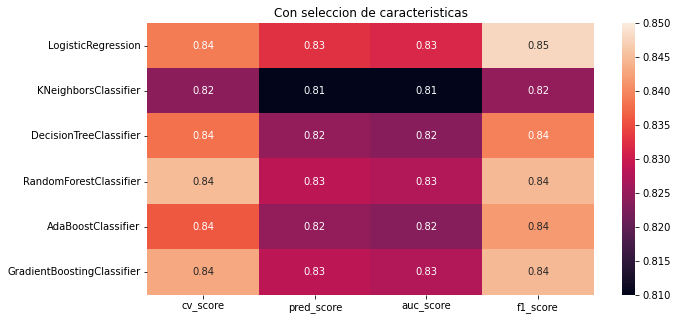

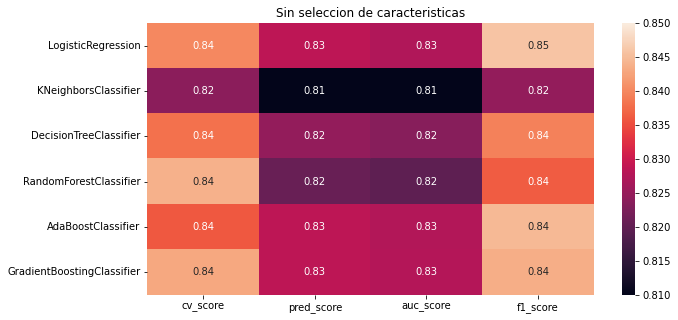

In [77]:
plt.subplots(figsize=(10,5))
sns.heatmap(model_scores_feature_sel, vmin=0.81, vmax=0.85, annot=True)
plt.title("Con seleccion de caracteristicas")

plt.subplots(figsize=(10,5))
sns.heatmap(model_scores, vmin=0.81, vmax=0.85, annot=True)
plt.title("Sin seleccion de caracteristicas")



---

Podemos observar que el modelo con sólo algunas características relevantes obtiene un rendimiento similar o hasta incluso mejor que aquellos modelos que poseen todas las caracteristicas, con la ventaja de una mayor rapidez en la velocidad de entrenamiento.



---



# **RESUMEN**



---



En este trabajo se exploro diferentes cuestiones de cómo algunos factores pueden afectar la actitud de una persona hacia la salud mental en lo que refiere al espacio de trabajo en el sector tecnológico.

**Los factores mas predictivos incluyen:**


1.   *Antecedentes familiares de enfermedad mental, las opciones de atencíon de salud mental que ofrecen los empleadores, beneficios proporcionados por los empleadores, si una condicion mental interfiere o no con el trabajo, la edad, el genero (una mayor proporcion del grupo femenino busca tratamiento para la condicion de salud mental).*

2.  *Varios modelos predictivos pueden estimar si una persona ha solicidado tratamiento por problema de salud mental con una precisión de 83%.*



3.   *Podemos ver que con un mejor apoyo por parte de los empleadores, el empleado tiene una mayor probabilidad de tener una actitud positiva hacia las condiciones de salud mental. Por lo tanto podemos mejorar la situacion si se proporciona mejores ayudase instalaciones con lo que respecta a la salud mental.*




---



